In [ ]:
!pip install yfinance==0.2.12

# **Downloading Data**

In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:
ticker = "TSLA"

data = yf.download(ticker, period="5y")

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


Loading Data

In [ ]:
data.to_csv('tesla_data.csv')

In [ ]:
df = pd.read_csv('tesla_data.csv')

# **Data Preprocessing**

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [ ]:
df.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)

In [ ]:
df

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...,...
1253,2024-12-24,435.899994,462.779999,435.140015,462.279999,462.279999,59551800
1254,2024-12-26,465.160004,465.329987,451.019989,454.130005,454.130005,76366400
1255,2024-12-27,449.519989,450.000000,426.500000,431.660004,431.660004,82666800
1256,2024-12-30,419.399994,427.000000,415.750000,417.410004,417.410004,64941000


In [ ]:
df.describe()

,Open,High,Low,Close,Adj_Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,213.482528,218.283913,208.359167,213.430922,213.430922,1.255299e+08
std,83.626859,85.396522,81.534697,83.461475,83.461475,8.208705e+07
min,24.980000,26.990667,23.367332,24.081333,24.081333,2.940180e+07
25%,173.897499,177.230003,170.044994,173.882500,173.882500,7.601958e+07
50%,220.933334,225.369995,215.343338,220.220001,220.220001,1.019894e+08
75%,259.270004,264.959175,254.450001,259.932495,259.932495,1.453064e+08
max,475.899994,488.540009,457.510010,479.859985,479.859985,9.140820e+08


In [ ]:
df.isna()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1253,False,False,False,False,False,False,False
1254,False,False,False,False,False,False,False
1255,False,False,False,False,False,False,False
1256,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj_Close,0
Volume,0


# **Data Visualization**

In [ ]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Tesla Open Price'}>

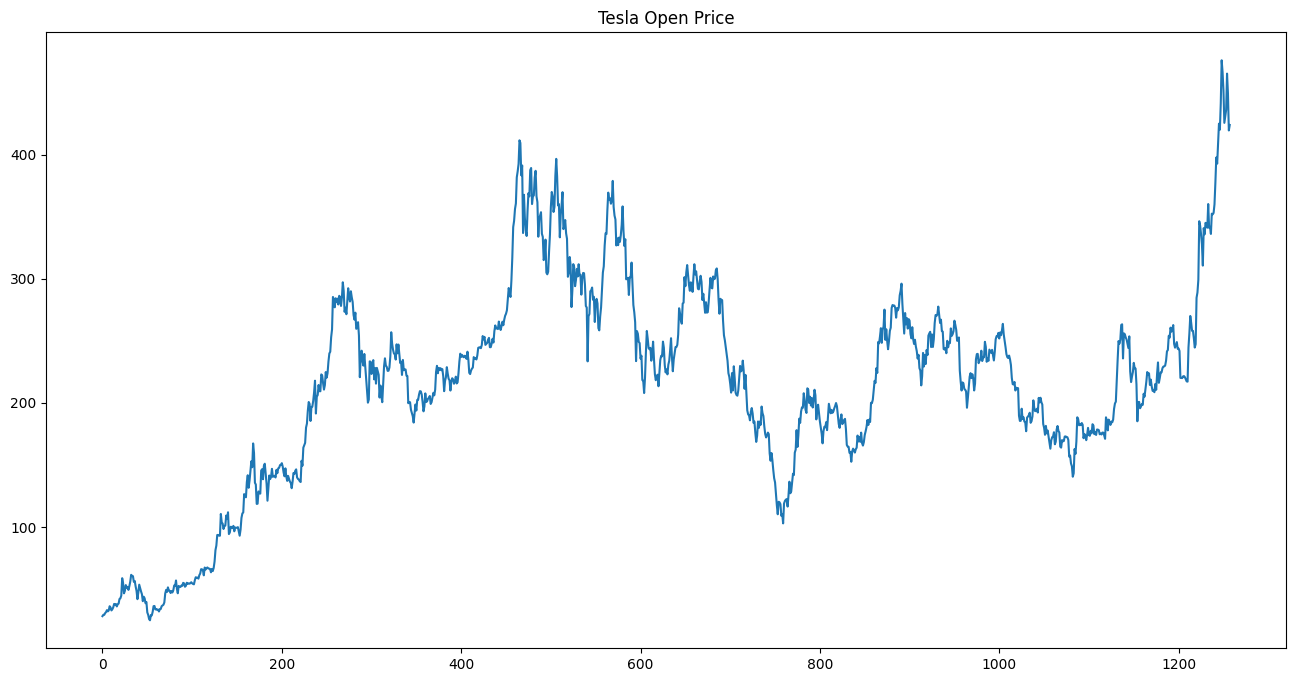

In [ ]:
df.Open.plot(figsize=(16,8), title='Tesla Open Price')

<Axes: title={'center': 'Tesla Close Price'}>

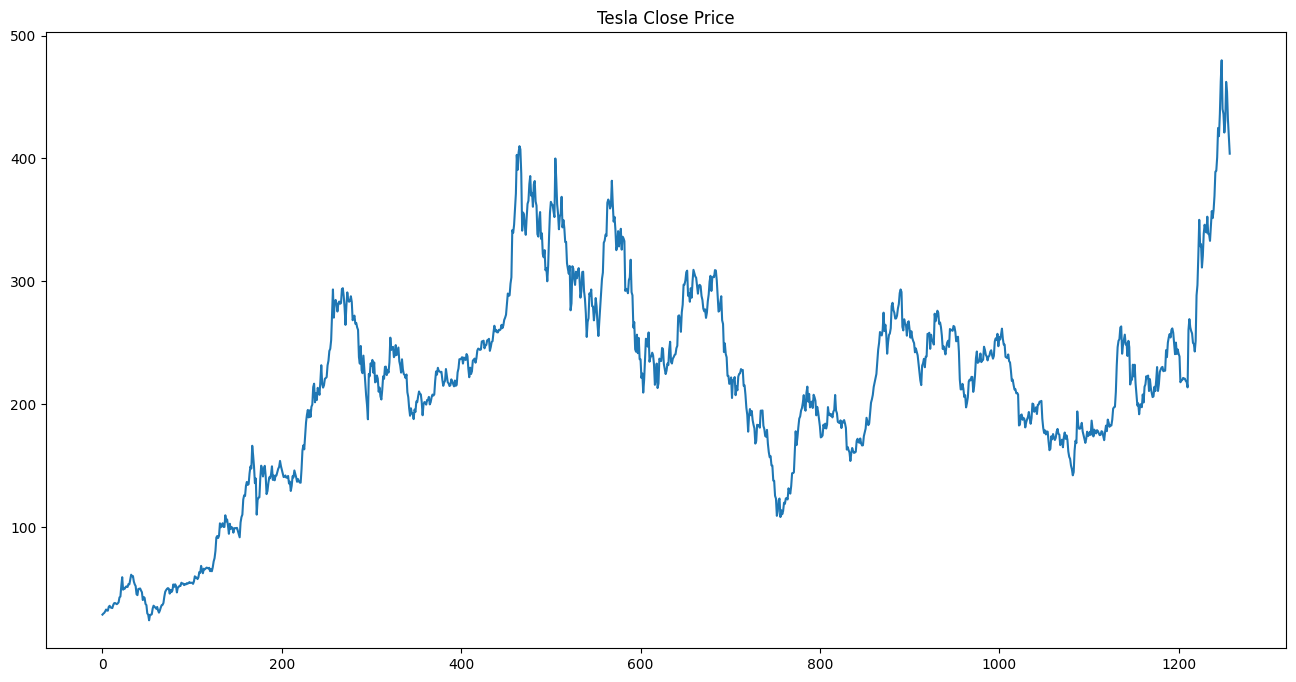

In [ ]:
df.Close.plot(figsize=(16,8), title = 'Tesla Close Price')

Text(0.5, 1.0, 'Tesla High vs Low Price')

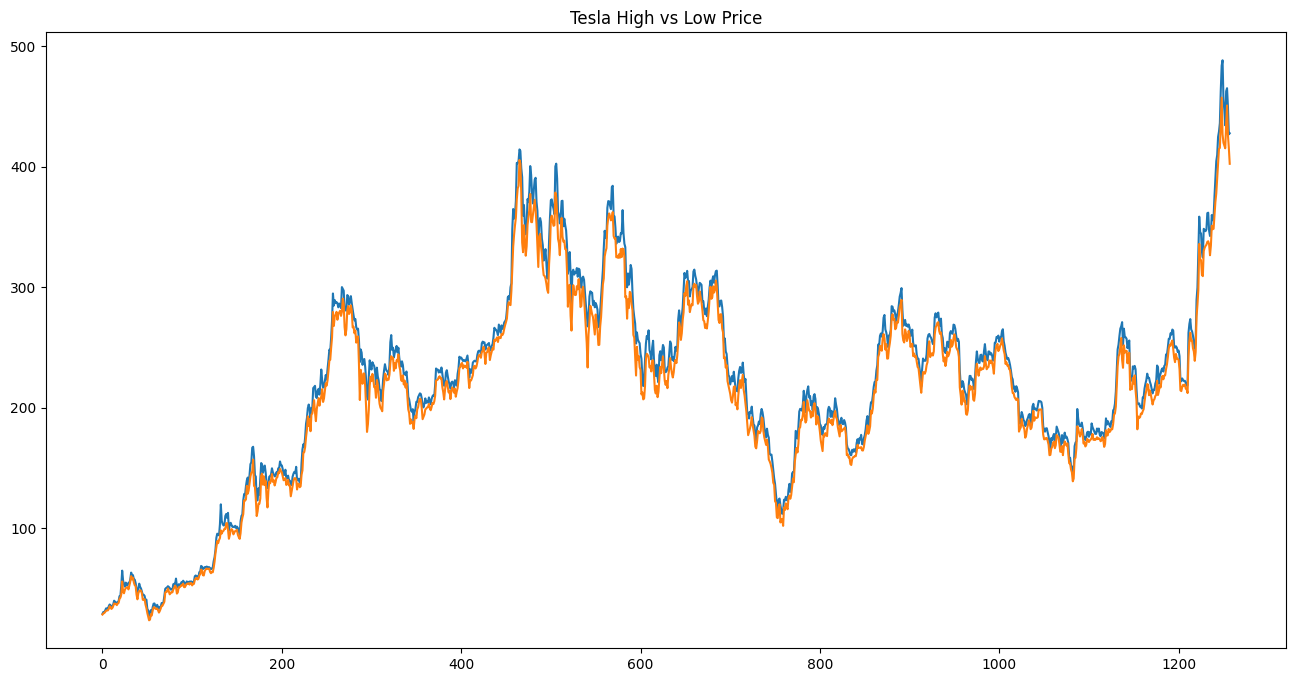

In [ ]:
df.High.plot(figsize=(16,8))
df.Low.plot(figsize=(16,8))
plt.title('Tesla High vs Low Price')

<Axes: title={'center': 'Tesla Adjusted Close Price'}>

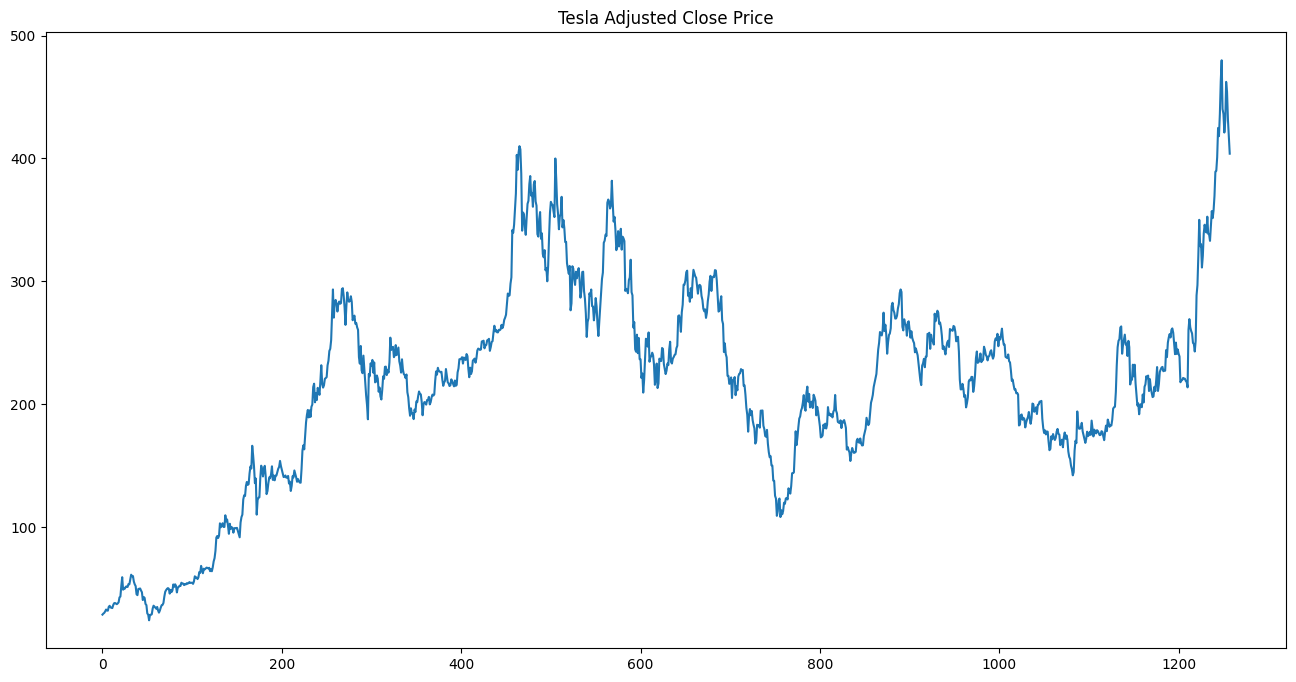

In [ ]:
df.Adj_Close.plot(figsize=(16,8), title = 'Tesla Adjusted Close Price')

<Axes: title={'center': 'Tesla Volume'}>

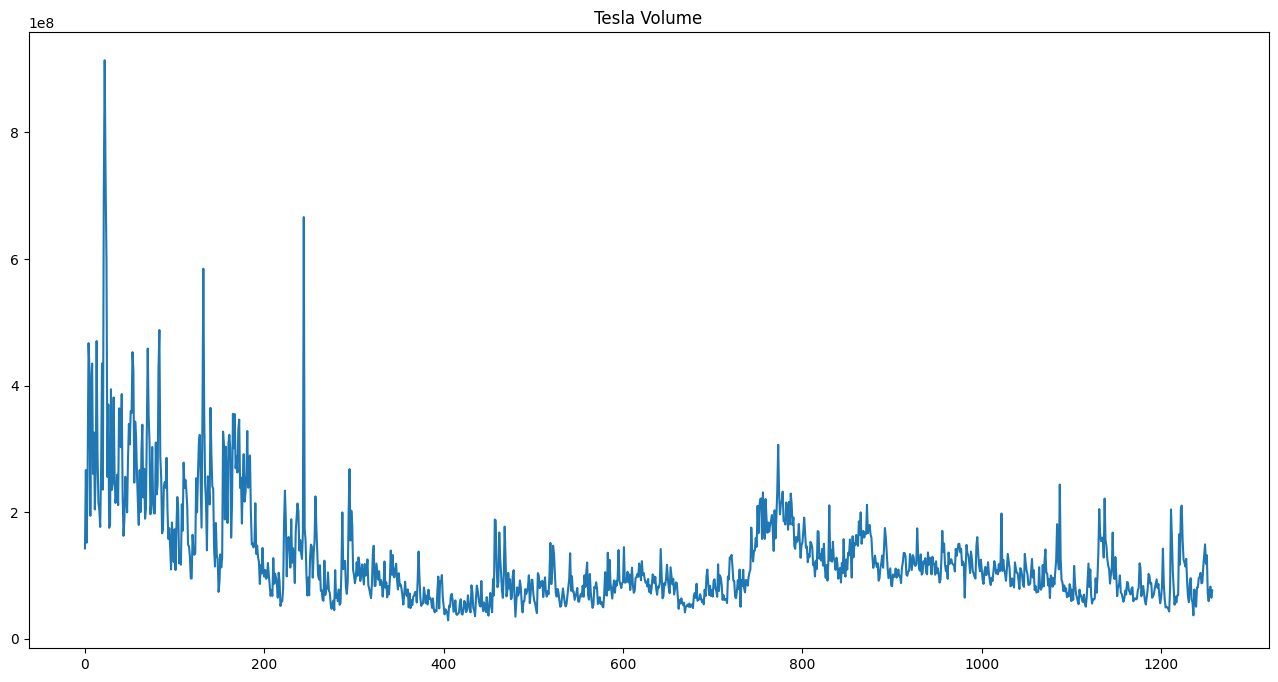

In [ ]:
df.Volume.plot(figsize=(16,8), title = 'Tesla Volume')

QQ Plot

In [ ]:
import scipy.stats
import pylab

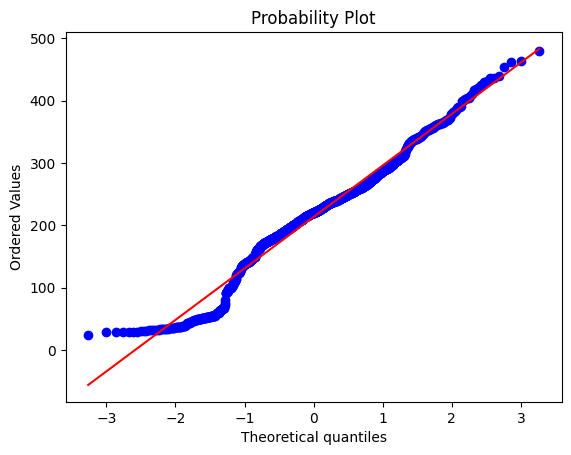

In [ ]:
scipy.stats.probplot(df.Adj_Close, dist="norm", plot=pylab)
pylab.show()

# **Date Manipluation**

In [ ]:
df.Date.describe()

,Date
count,1258
unique,1258
top,2020-01-02
freq,1


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.Date.describe()

,Date
count,1258
mean,2022-07-01 15:39:46.645468928
min,2020-01-02 00:00:00
25%,2021-04-02 00:00:00
50%,2022-06-30 12:00:00
75%,2023-10-01 06:00:00
max,2024-12-31 00:00:00


In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [ ]:
df_mod = df.asfreq('b')

In [ ]:
df_mod.head()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500.0
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500.0
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000.0
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500.0
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500.0


In [ ]:
df_mod.isna().sum()

,0
Open,46
High,46
Low,46
Close,46
Adj_Close,46
Volume,46


In [ ]:
df_mod = df_mod.fillna(method='ffill')

<ipython-input-28-ef8fec6e8989>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_mod = df_mod.fillna(method='ffill')


In [ ]:
df_mod.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj_Close,0
Volume,0


In [ ]:
df_mod

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500.0
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500.0
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000.0
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500.0
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500.0
...,...,...,...,...,...,...
2024-12-25,435.899994,462.779999,435.140015,462.279999,462.279999,59551800.0
2024-12-26,465.160004,465.329987,451.019989,454.130005,454.130005,76366400.0
2024-12-27,449.519989,450.000000,426.500000,431.660004,431.660004,82666800.0


# **Calculating Market capital**

In [ ]:
df_mod['Market_Cap'] = df_mod.Volume * df_mod.Adj_Close

In [ ]:
df_mod

,Open,High,Low,Close,Adj_Close,Volume,Market_Cap
Date,,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500.0,4.101281e+09
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500.0,7.876053e+09
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000.0,4.575455e+09
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500.0,8.387778e+09
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500.0,1.532736e+10
...,...,...,...,...,...,...,...
2024-12-25,435.899994,462.779999,435.140015,462.279999,462.279999,59551800.0,2.752961e+10
2024-12-26,465.160004,465.329987,451.019989,454.130005,454.130005,76366400.0,3.468027e+10
2024-12-27,449.519989,450.000000,426.500000,431.660004,431.660004,82666800.0,3.568395e+10


<Axes: title={'center': 'Tesla Market Capital'}, xlabel='Date'>

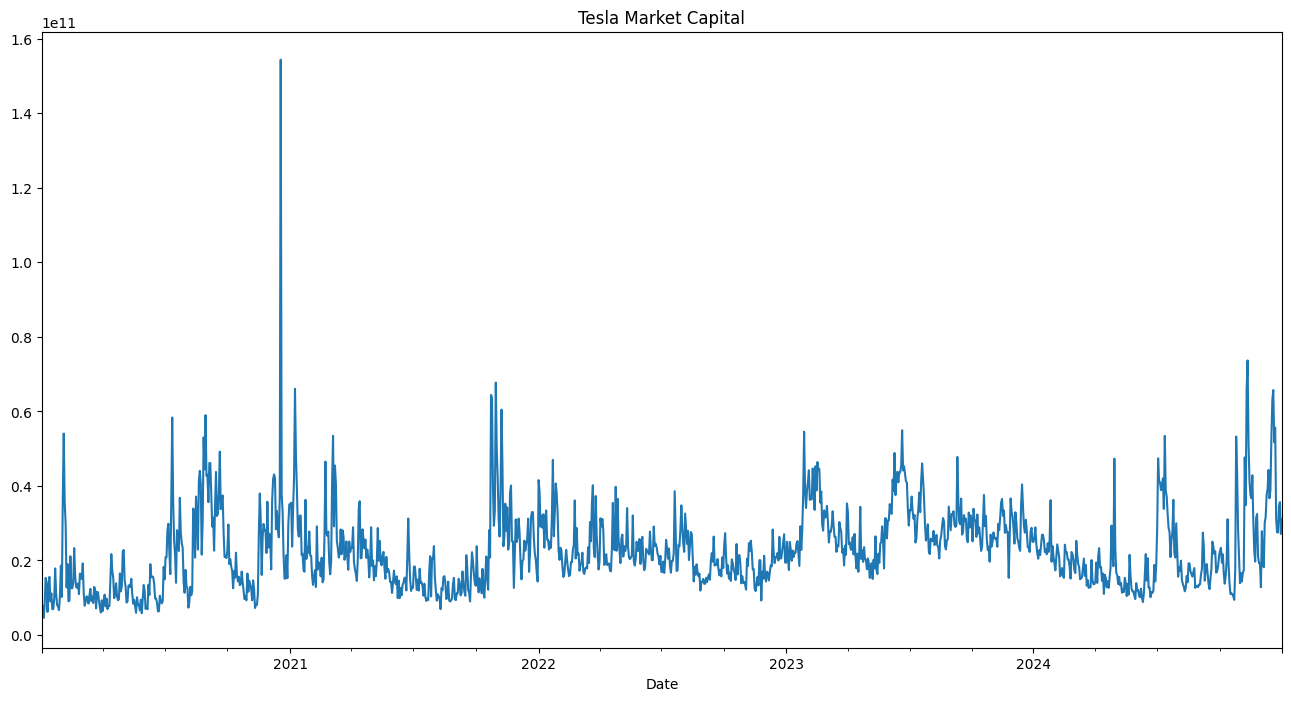

In [ ]:
df_mod.Market_Cap.plot(figsize=(16,8), title = 'Tesla Market Capital')

# **Calculating Return**

In [ ]:
df_mod['Return'] = df_mod.Adj_Close.pct_change(1).mul(100)
df_mod = df_mod.iloc[1:]

In [ ]:
df_mod

,Open,High,Low,Close,Adj_Close,Volume,Market_Cap,Return
Date,,,,,,,,
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500.0,7.876053e+09,2.963326
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000.0,4.575455e+09,1.925464
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500.0,8.387778e+09,3.880052
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500.0,1.532736e+10,4.920483
2020-01-09,33.139999,33.253334,31.524668,32.089333,32.089333,426606000.0,1.368950e+10,-2.194501
...,...,...,...,...,...,...,...,...
2024-12-25,435.899994,462.779999,435.140015,462.279999,462.279999,59551800.0,2.752961e+10,0.000000
2024-12-26,465.160004,465.329987,451.019989,454.130005,454.130005,76366400.0,3.468027e+10,-1.762999
2024-12-27,449.519989,450.000000,426.500000,431.660004,431.660004,82666800.0,3.568395e+10,-4.947923


<Axes: title={'center': 'Tesla Return'}, xlabel='Date'>

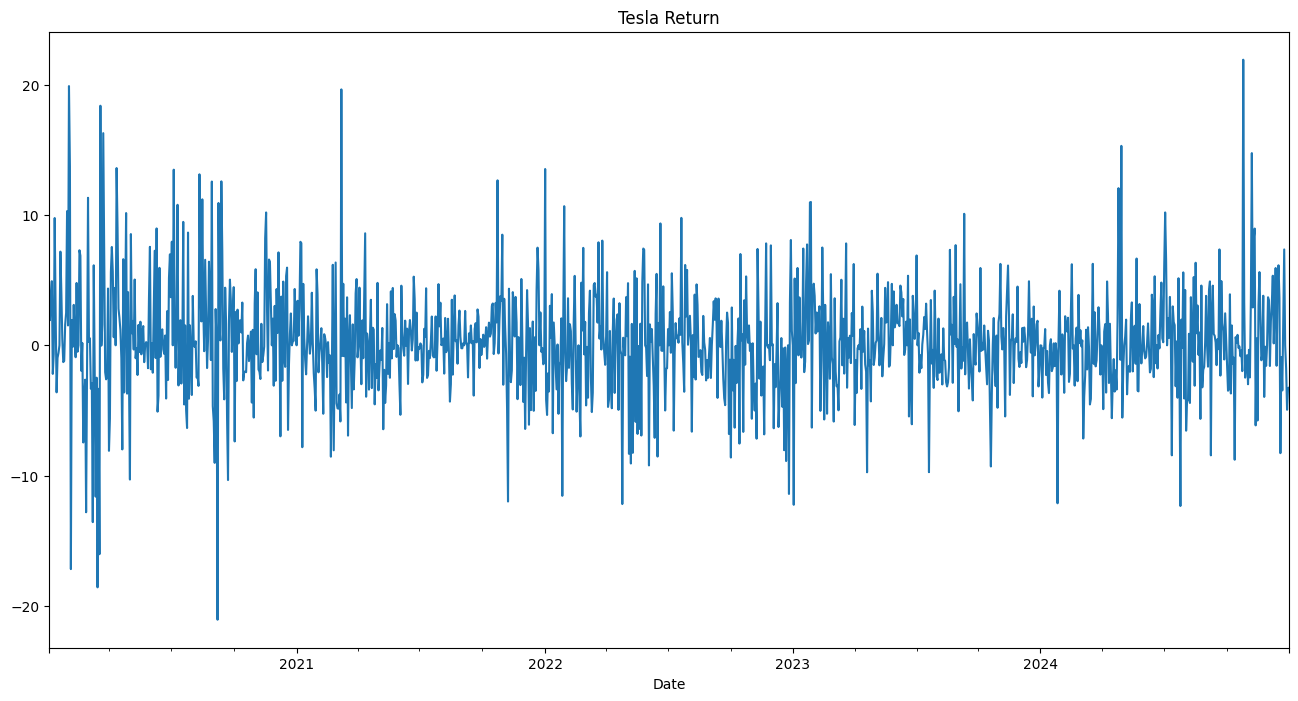

In [ ]:
df_mod.Return.plot(figsize=(16,8), title = 'Tesla Return')

# **Splitting**

In [ ]:
size = int(len(df_mod) * 0.9)

In [ ]:
df_train = df_mod.iloc[:size]
df_test = df_mod.iloc[size:]

In [ ]:
df_train.tail()

,Open,High,Low,Close,Adj_Close,Volume,Market_Cap,Return
Date,,,,,,,,
2024-06-25,184.399994,187.970001,182.009995,187.350006,187.350006,63678300.0,1.193013e+10,2.612556
2024-06-26,186.539993,197.759995,186.360001,196.369995,196.369995,95737100.0,1.879989e+10,4.814512
2024-06-27,195.169998,198.720001,194.050003,197.419998,197.419998,72746500.0,1.436161e+10,0.534706
2024-06-28,199.550003,203.199997,195.259995,197.880005,197.880005,95438100.0,1.888529e+10,0.233009
2024-07-01,201.020004,213.229996,200.850006,209.860001,209.860001,135691400.0,2.847620e+10,6.054172


In [ ]:
df_test.head()

,Open,High,Low,Close,Adj_Close,Volume,Market_Cap,Return
Date,,,,,,,,
2024-07-02,218.889999,231.300003,218.059998,231.259995,231.259995,205047900.0,4.741938e+10,10.197271
2024-07-03,234.559998,248.350006,234.250000,246.389999,246.389999,166561500.0,4.103909e+10,6.542422
2024-07-04,234.559998,248.350006,234.250000,246.389999,246.389999,166561500.0,4.103909e+10,0.000000
2024-07-05,249.809998,252.369995,242.460007,251.520004,251.520004,154501200.0,3.886014e+10,2.082067
2024-07-08,247.710007,259.440002,244.570007,252.940002,252.940002,157219600.0,3.976713e+10,0.564567


In [ ]:
df_train.shape

(1172, 8)

In [ ]:
df_test.shape

(131, 8)

# **Comparing White Noise**

In [ ]:
import numpy as np

In [ ]:
wn = np.random.normal(loc = df_train.Adj_Close.mean(), scale = df_train.Adj_Close.std(), size = len(df_train.index))
df_train['White_Noise'] = wn

<ipython-input-44-de1e34595697>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['White_Noise'] = wn


In [ ]:
df_train.describe()

,Open,High,Low,Close,Adj_Close,Volume,Market_Cap,Return,White_Noise
count,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1.172000e+03,1.172000e+03,1172.000000,1172.000000
mean,206.734985,211.365850,201.807588,206.708055,206.708055,1.288603e+08,2.243727e+10,0.254725,206.788740
std,81.536577,83.170774,79.619992,81.371588,81.371588,8.421493e+07,1.043899e+10,4.122493,84.717315
min,24.980000,26.990667,23.367332,24.081333,24.081333,2.940180e+07,4.575455e+09,-21.062824,-133.778728
25%,167.817497,171.192497,164.240005,168.212494,168.212494,7.718922e+07,1.520492e+10,-1.864106,149.165887
50%,215.633339,220.970001,210.025002,216.078331,216.078331,1.044675e+08,2.101248e+10,0.099792,208.997001
75%,257.476662,261.702492,252.022503,257.290001,257.290001,1.497818e+08,2.772665e+10,2.102133,263.497522
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08,1.543777e+11,19.894859,455.111212


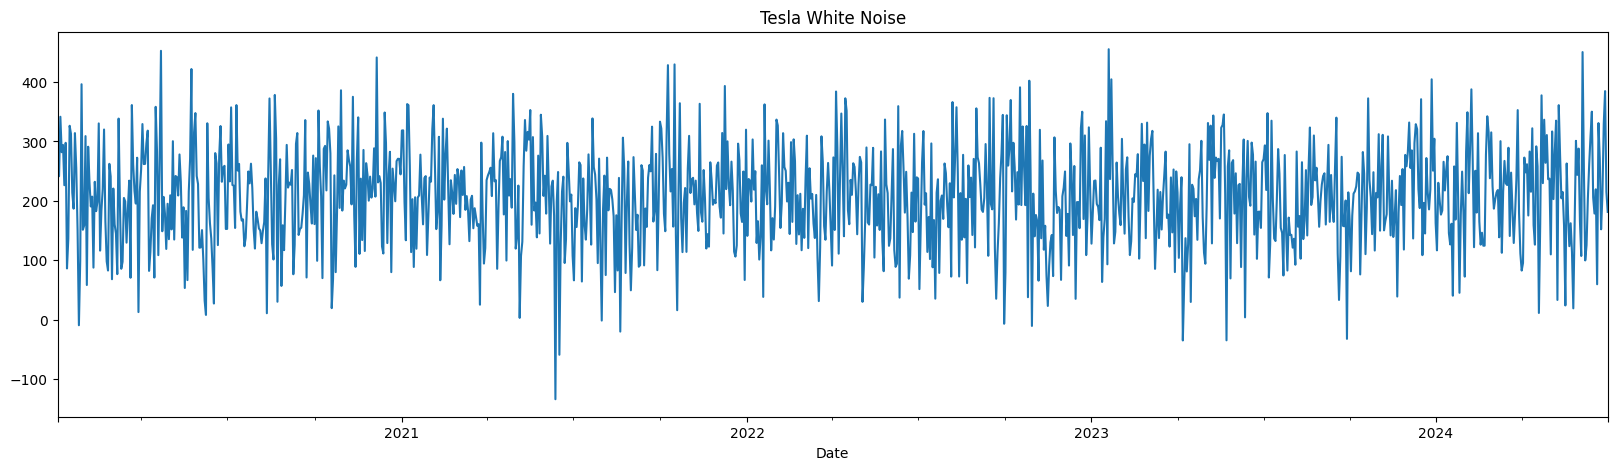

In [ ]:
df_train.White_Noise.plot(figsize = (20,5))
plt.title('Tesla White Noise')
plt.show()

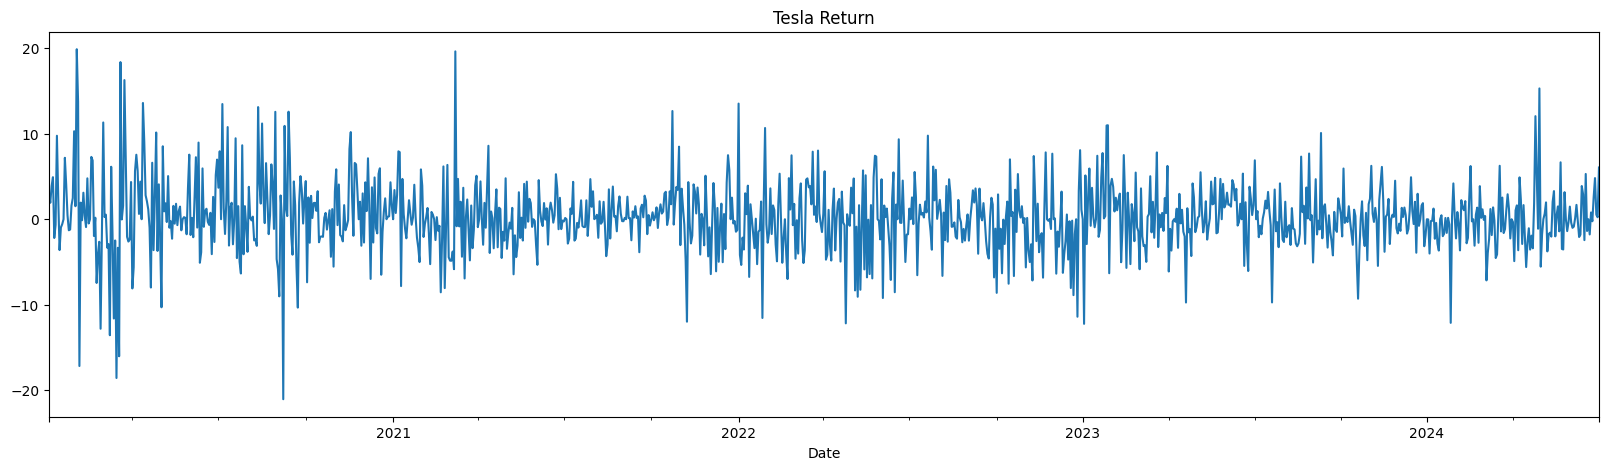

In [ ]:
df_train.Return.plot(figsize = (20,5))
plt.title('Tesla Return')
plt.show()

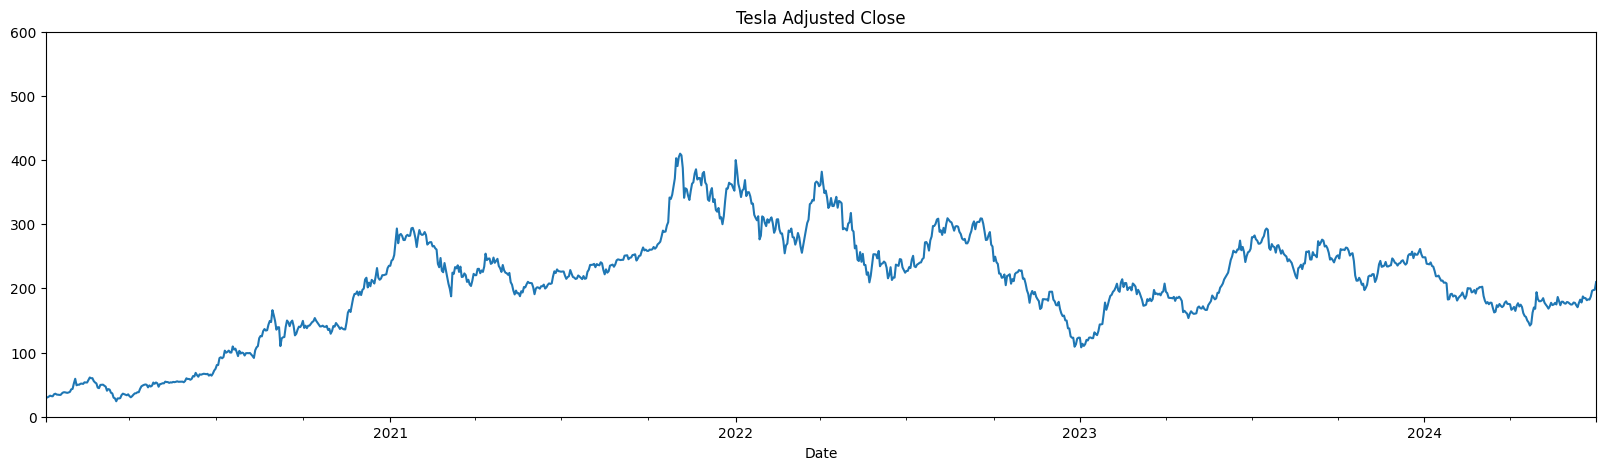

In [ ]:
df_train.Adj_Close.plot(figsize = (20,5))
plt.title('Tesla Adjusted Close')
plt.ylim(0,600)
plt.show()

# **Random Walk**

In [ ]:
start_price = df_train['Adj_Close'].iloc[0]

random_steps = np.random.normal(loc=0, scale=df_train['Adj_Close'].std(), size=len(df_train))

random_walk = start_price + np.cumsum(random_steps)

df_train['Random_Walk'] = random_walk

<ipython-input-49-ada42d0afc9c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Random_Walk'] = random_walk


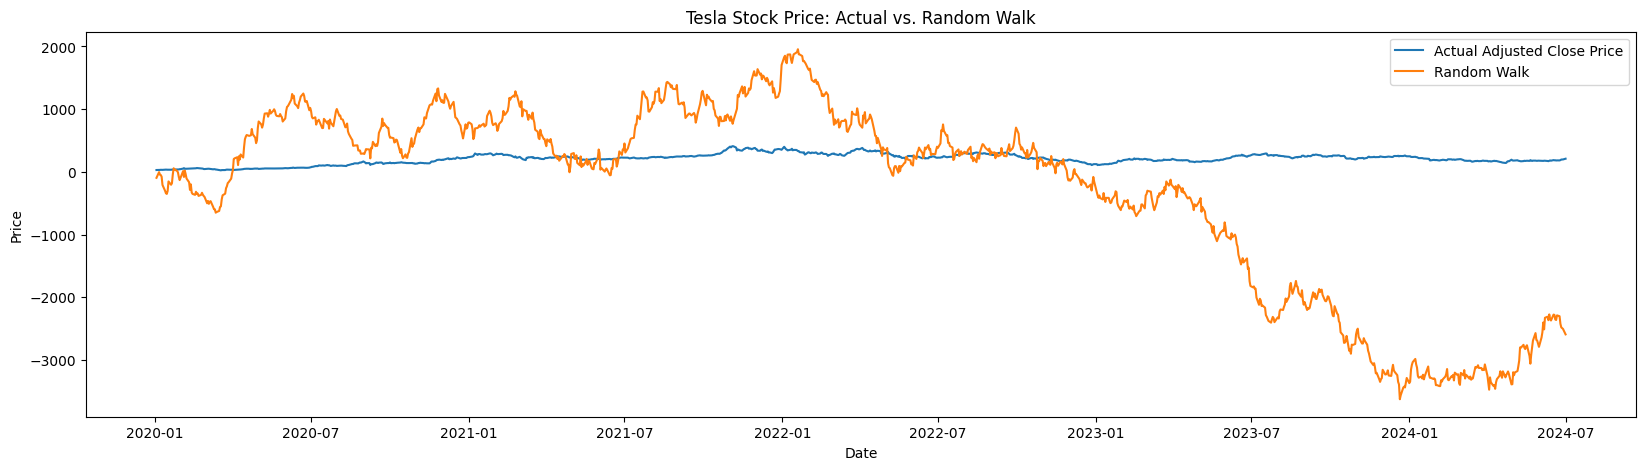

In [ ]:

plt.figure(figsize=(20,5))
plt.plot(df_train.index, df_train['Adj_Close'], label='Actual Adjusted Close Price')
plt.plot(df_train.index, df_train['Random_Walk'], label='Random Walk')
plt.title('Tesla Stock Price: Actual vs. Random Walk')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# **Stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller

adfuller(df_train.Adj_Close)

(-2.5635566796848215,
 0.10076568265121644,
 9,
 1162,
 {'1%': -3.4359901072390353,
  '5%': -2.86403051064684,
  '10%': -2.5680960046332366},
 8091.684618254511)

In [ ]:
adfuller(df_train.White_Noise)

(-15.636676839132829,
 1.6596838119992085e-28,
 3,
 1168,
 {'1%': -3.4359610700352032,
  '5%': -2.8640177006421395,
  '10%': -2.568089182333693},
 13436.358906889294)

In [ ]:
adfuller(df_train.Random_Walk)

(-0.27583137706945937,
 0.9288582676240592,
 0,
 1171,
 {'1%': -3.435946663265958,
  '5%': -2.864011344929883,
  '10%': -2.568085797441879},
 13332.908998611863)

In [ ]:
adfuller(df_train.High)

(-2.4184044327645324,
 0.1366091271633167,
 4,
 1167,
 {'1%': -3.4359658887882794,
  '5%': -2.8640198264838013,
  '10%': -2.5680903145043392},
 7812.630409252996)

In [ ]:
adfuller(df_train.Low)

(-2.469782486577396,
 0.12300073002672207,
 1,
 1170,
 {'1%': -3.435951457295239,
  '5%': -2.8640134598745144,
  '10%': -2.5680869238074364},
 7862.20279251924)

In [ ]:
adfuller(df_train.Market_Cap)

(-4.367367146300074,
 0.00033889303893855767,
 14,
 1157,
 {'1%': -3.436014535478888,
  '5%': -2.8640412872730208,
  '10%': -2.56810174401953},
 55349.61156377635)

In [ ]:
adfuller(df_train.Return)

(-34.58483876803633,
 0.0,
 0,
 1171,
 {'1%': -3.435946663265958,
  '5%': -2.864011344929883,
  '10%': -2.568085797441879},
 6464.052886129963)

# **Seasonality**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

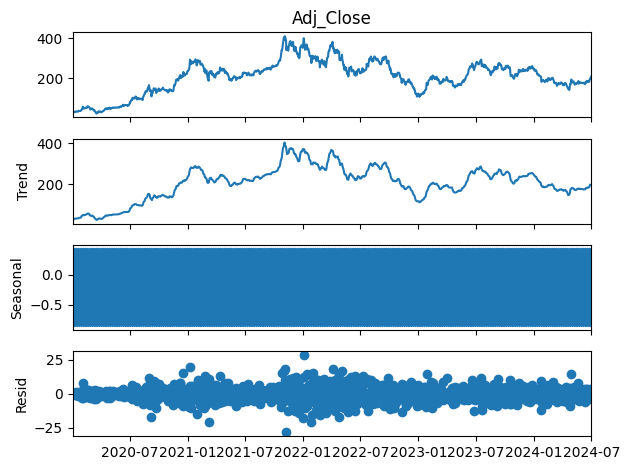

In [ ]:
s_dec_additive = seasonal_decompose(df_train.Adj_Close, model='additive')
s_dec_additive.plot()
plt.show()

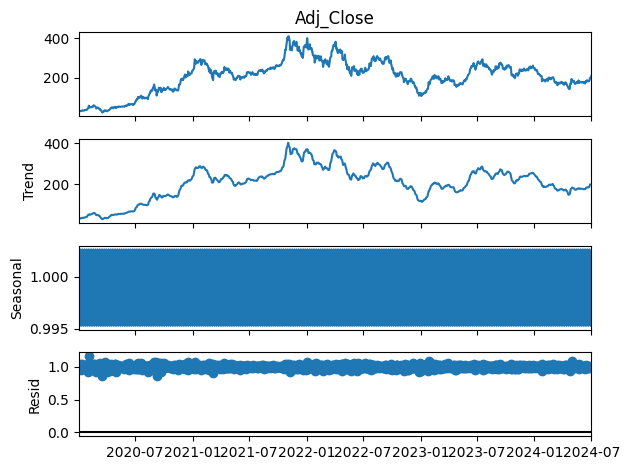

In [ ]:
s_dec_multiplicative = seasonal_decompose(df_train.Adj_Close, model='multiplicative')
s_dec_multiplicative.plot()
plt.show()

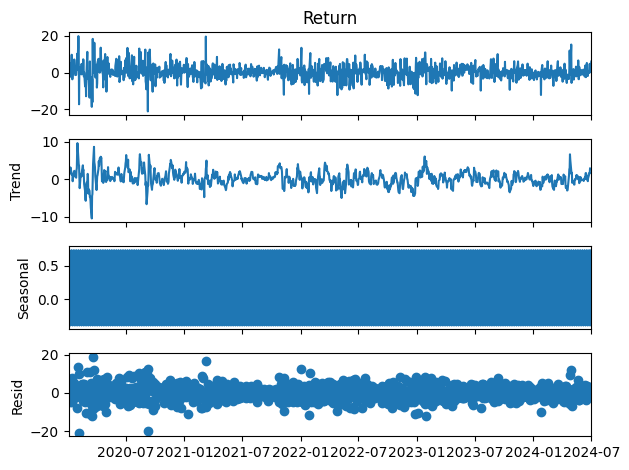

In [ ]:
s_dec_additive_2 = seasonal_decompose(df_train.Return, model='additive')
s_dec_additive_2.plot()
plt.show()

# **Auto Correlation**

In [ ]:
import statsmodels.graphics.tsaplots as sgt

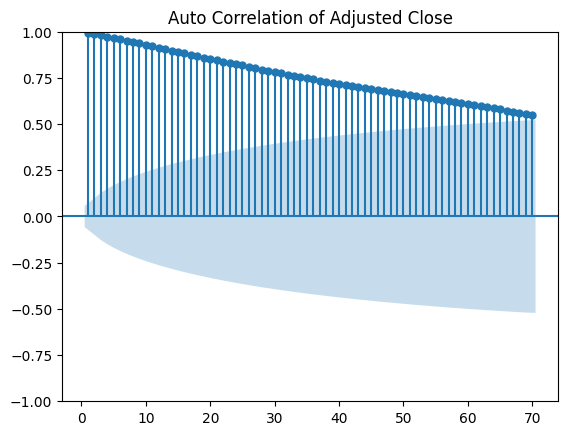

In [ ]:
sgt.plot_acf(df_train.Adj_Close, lags=70, zero = False)
plt.title('Auto Correlation of Adjusted Close')
plt.show()

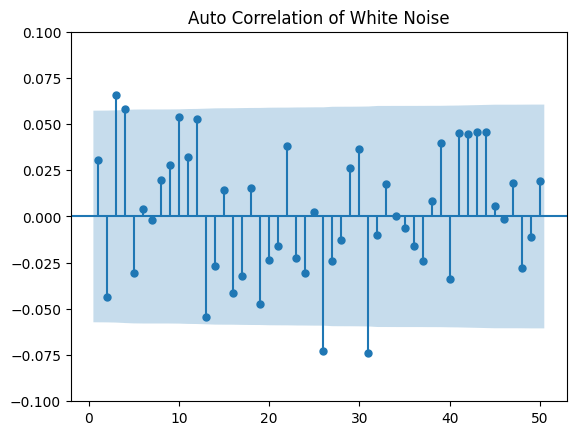

In [ ]:
sgt.plot_acf(df_train.White_Noise, lags=50, zero = False)
plt.title('Auto Correlation of White Noise')
plt.ylim(-0.1,0.1)
plt.show()

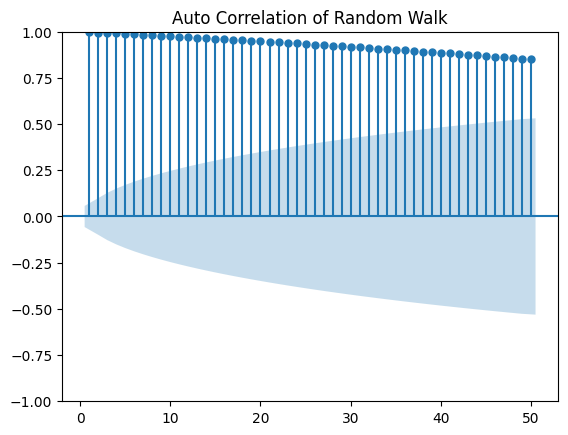

In [ ]:
sgt.plot_acf(df_train.Random_Walk, lags=50, zero = False)
plt.title('Auto Correlation of Random Walk')
plt.show()

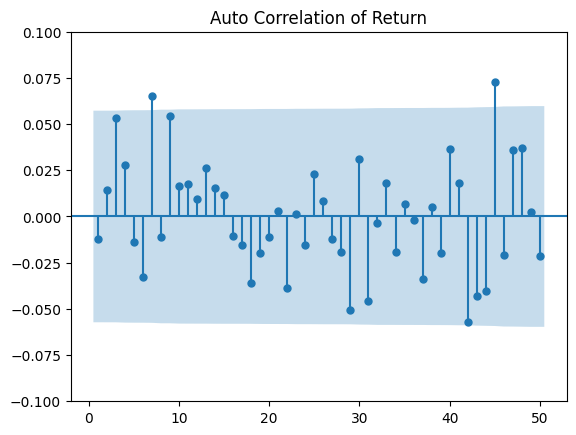

In [ ]:
sgt.plot_acf(df_train.Return, lags=50, zero = False)
plt.title('Auto Correlation of Return')
plt.ylim(-0.1,0.1)
plt.show()

# **Partial Auto Correlation**

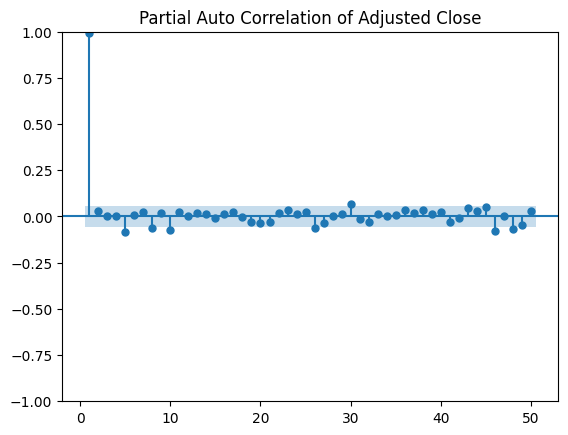

In [ ]:
sgt.plot_pacf(df_train.Adj_Close, lags=50, zero = False, method= ('ols'))
plt.title('Partial Auto Correlation of Adjusted Close')
plt.show()

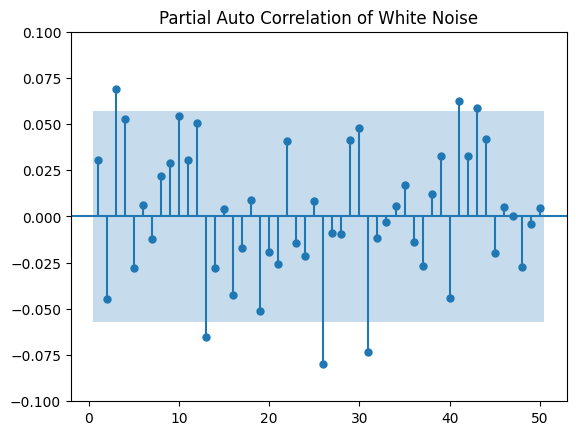

In [ ]:
sgt.plot_pacf(df_train.White_Noise, lags=50, zero = False, method= ('ols'))
plt.title('Partial Auto Correlation of White Noise')
plt.ylim(-0.1,0.1)
plt.show()

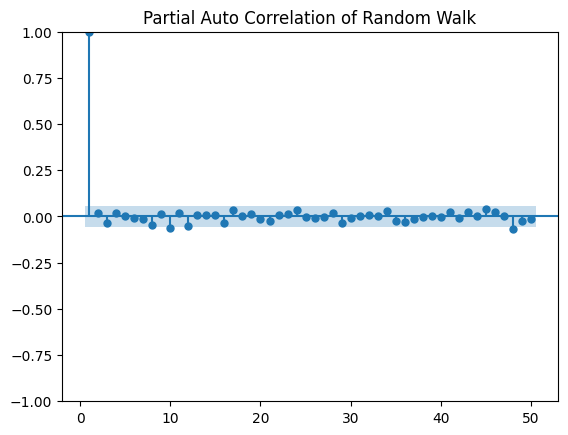

In [ ]:
sgt.plot_pacf(df_train.Random_Walk, lags=50, zero = False, method= ('ols'))
plt.title('Partial Auto Correlation of Random Walk')
plt.show()

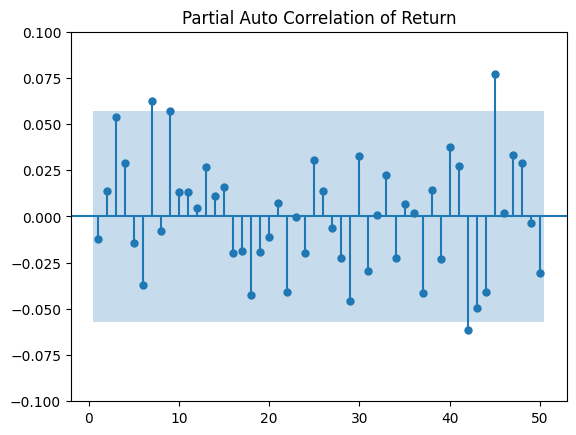

In [ ]:
sgt.plot_pacf(df_train.Return, lags=50, zero = False, method= ('ols'))
plt.title('Partial Auto Correlation of Return')
plt.ylim(-0.1,0.1)
plt.show()

# **Auto Regressive Model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

AR(1) Model

In [ ]:
model_ar = ARIMA(df_train.Adj_Close, order=(1, 0, 0))
results_ar = model_ar.fit()

In [ ]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj_Close   No. Observations:                 1172
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -4125.240
Date:                Wed, 01 Jan 2025   AIC                           8256.479
Time:                        16:50:39   BIC                           8271.679
Sample:                    01-03-2020   HQIC                          8262.212
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        206.4455     37.096      5.565      0.000     133.738     279.153
ar.L1          0.9959      0.002    497.105      0.000       0.992       1.000
sigma2        66.5308      1.578     42.172      0.000      63.439      69.623
===================================================================================
Ljung-Box (L1) (Q):                   1.02   Jarque-Bera (JB):               816.72
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.04
Prob(H) (two-sided):                  0.97   Kurtosis:                         7.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Higher Order AR Model

In [ ]:
model_ar_2 = ARIMA(df_train.Adj_Close, order=(2, 0, 0))
results_ar_2 = model_ar_2.fit()

In [ ]:
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj_Close   No. Observations:                 1172
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -4124.815
Date:                Wed, 01 Jan 2025   AIC                           8257.629
Time:                        16:50:40   BIC                           8277.895
Sample:                    01-03-2020   HQIC                          8265.272
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        206.6290     38.644      5.347      0.000     130.889     282.369
ar.L1          0.9690      0.025     38.574      0.000       0.920       1.018
ar.L2          0.0270      0.025      1.076      0.282      -0.022       0.076
sigma2        66.4828      1.580     42.068      0.000      63.385      69.580
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               831.89
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.04
Prob(H) (two-sided):                  0.94   Kurtosis:                         7.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar_3 = ARIMA(df_train.Adj_Close, order=(3, 0, 0))
results_ar_3 = model_ar_3.fit()

In [ ]:
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj_Close   No. Observations:                 1172
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -4124.814
Date:                Wed, 01 Jan 2025   AIC                           8259.628
Time:                        16:50:40   BIC                           8284.960
Sample:                    01-03-2020   HQIC                          8269.181
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        206.6297     38.716      5.337      0.000     130.748     282.511
ar.L1          0.9690      0.025     38.474      0.000       0.920       1.018
ar.L2          0.0259      0.035      0.742      0.458      -0.043       0.094
ar.L3          0.0012      0.023      0.051      0.959      -0.043       0.045
sigma2        66.4826      1.580     42.067      0.000      63.385      69.580
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               832.02
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.04
Prob(H) (two-sided):                  0.94   Kurtosis:                         7.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar_4 = ARIMA(df_train.Adj_Close, order=(4, 0, 0))
results_ar_4 = model_ar_4.fit()

In [ ]:
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj_Close   No. Observations:                 1172
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -4124.814
Date:                Wed, 01 Jan 2025   AIC                           8261.628
Time:                        16:50:42   BIC                           8292.027
Sample:                    01-03-2020   HQIC                          8273.092
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        206.6298     38.734      5.335      0.000     130.713     282.547
ar.L1          0.9690      0.025     38.464      0.000       0.920       1.018
ar.L2          0.0259      0.035      0.742      0.458      -0.043       0.094
ar.L3          0.0010      0.034      0.029      0.977      -0.066       0.068
ar.L4          0.0002      0.027      0.006      0.995      -0.053       0.053
sigma2        66.4822      1.586     41.910      0.000      63.373      69.591
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               831.94
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.04
Prob(H) (two-sided):                  0.94   Kurtosis:                         7.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar_5 = ARIMA(df_train.Adj_Close, order=(5, 0, 0))
results_ar_5 = model_ar_5.fit()

In [ ]:
results_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj_Close   No. Observations:                 1172
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -4120.580
Date:                Wed, 01 Jan 2025   AIC                           8255.161
Time:                        16:50:43   BIC                           8290.626
Sample:                    01-03-2020   HQIC                          8268.536
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        206.6394     35.863      5.762      0.000     136.349     276.930
ar.L1          0.9692      0.025     38.671      0.000       0.920       1.018
ar.L2          0.0259      0.035      0.740      0.459      -0.043       0.094
ar.L3          0.0032      0.034      0.092      0.926      -0.064       0.071
ar.L4          0.0823      0.036      2.300      0.021       0.012       0.152
ar.L5         -0.0849      0.023     -3.636      0.000      -0.131      -0.039
sigma2        66.0053      1.569     42.073      0.000      62.930      69.080
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               855.02
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.00
Prob(H) (two-sided):                  0.99   Kurtosis:                         7.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Log Likelyhood Ratio Test

In [ ]:
from scipy.stats import chi2

In [ ]:
def LLR_Test(mod_1, mod_2, df=1):
  L1 = mod_1.fit().llf
  L2 = mod_2.fit().llf
  LR = (2*(L2-L1))
  p = chi2.sf(LR, df).round(3)
  return p

In [ ]:
LLR_Test(model_ar, model_ar_2)

0.357

In [ ]:
LLR_Test(model_ar, model_ar_3)

0.356

In [ ]:
LLR_Test(model_ar, model_ar_4)

0.356

In [ ]:
LLR_Test(model_ar, model_ar_5)

0.002

# **AR for Adj_Close**

In [ ]:
import pandas as pd

models = {}
results = {}

for i in range(1, 31):
    model = ARIMA(df_train['Adj_Close'], order=(i, 0, 0))
    results[i] = model.fit()
    models[i] = model
    print(f"Model AR({i}) fitted... ({i}/30)")

Model AR(1) fitted... (1/30)
Model AR(2) fitted... (2/30)
Model AR(3) fitted... (3/30)
Model AR(4) fitted... (4/30)
Model AR(5) fitted... (5/30)
Model AR(6) fitted... (6/30)
Model AR(7) fitted... (7/30)
Model AR(8) fitted... (8/30)
Model AR(9) fitted... (9/30)
Model AR(10) fitted... (10/30)
Model AR(11) fitted... (11/30)
Model AR(12) fitted... (12/30)
Model AR(13) fitted... (13/30)
Model AR(14) fitted... (14/30)
Model AR(15) fitted... (15/30)
Model AR(16) fitted... (16/30)
Model AR(17) fitted... (17/30)
Model AR(18) fitted... (18/30)
Model AR(19) fitted... (19/30)
Model AR(20) fitted... (20/30)
Model AR(21) fitted... (21/30)
Model AR(22) fitted... (22/30)
Model AR(23) fitted... (23/30)
Model AR(24) fitted... (24/30)
Model AR(25) fitted... (25/30)
Model AR(26) fitted... (26/30)
Model AR(27) fitted... (27/30)
Model AR(28) fitted... (28/30)
Model AR(29) fitted... (29/30)
Model AR(30) fitted... (30/30)


In [ ]:
def LLR_Test(mod_1, mod_2):
    df = mod_2.model_orders['ar'] - mod_1.model_orders['ar']
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = 2 * (L2 - L1)
    p = chi2.sf(LR, df).round(3)
    return p

best_model_order = 1

for i in range(2, 31):
    p_value = LLR_Test(results[best_model_order], results[i])
    if p_value < 0.05:
        best_model_order = i

print(f"Best AR model order: {best_model_order}")


Best AR model order: 10


In [ ]:
model_ar_10 = ARIMA(df_train.Adj_Close, order=(10, 0, 0))
results_ar_10 = model_ar_10.fit()

In [ ]:
results_ar_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj_Close   No. Observations:                 1172
Model:                ARIMA(10, 0, 0)   Log Likelihood               -4114.138
Date:                Wed, 01 Jan 2025   AIC                           8252.276
Time:                        17:05:12   BIC                           8313.074
Sample:                    01-03-2020   HQIC                          8275.205
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        206.6483     33.662      6.139      0.000     140.672     272.624
ar.L1          0.9741      0.027     36.568      0.000       0.922       1.026
ar.L2          0.0183      0.037      0.496      0.620      -0.054       0.091
ar.L3          0.0021      0.035      0.059      0.953      -0.066       0.071
ar.L4          0.0881      0.036      2.441      0.015       0.017       0.159
ar.L5         -0.1012      0.032     -3.180      0.001      -0.164      -0.039
ar.L6         -0.0092      0.032     -0.290      0.772      -0.072       0.053
ar.L7          0.0880      0.034      2.580      0.010       0.021       0.155
ar.L8         -0.0826      0.034     -2.405      0.016      -0.150      -0.015
ar.L9          0.0924      0.033      2.765      0.006       0.027       0.158
ar.L10        -0.0748      0.025     -3.014      0.003      -0.123      -0.026
sigma2        65.2764      1.612     40.497      0.000      62.117      68.436
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               843.02
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.04
Prob(H) (two-sided):                  0.98   Kurtosis:                         7.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# **AR for Return**

In [ ]:
import pandas as pd

models_return = {}
results_return = {}

for i in range(1, 31):
    model_return = ARIMA(df_train['Return'], order=(i, 0, 0))
    results_return[i] = model_return.fit()
    models_return[i] = model_return
    print(f"Model AR({i}) for return fitted... ({i}/30)")

Model AR(1) for return fitted... (1/30)
Model AR(2) for return fitted... (2/30)
Model AR(3) for return fitted... (3/30)
Model AR(4) for return fitted... (4/30)
Model AR(5) for return fitted... (5/30)
Model AR(6) for return fitted... (6/30)
Model AR(7) for return fitted... (7/30)
Model AR(8) for return fitted... (8/30)
Model AR(9) for return fitted... (9/30)
Model AR(10) for return fitted... (10/30)
Model AR(11) for return fitted... (11/30)
Model AR(12) for return fitted... (12/30)
Model AR(13) for return fitted... (13/30)
Model AR(14) for return fitted... (14/30)
Model AR(15) for return fitted... (15/30)
Model AR(16) for return fitted... (16/30)
Model AR(17) for return fitted... (17/30)
Model AR(18) for return fitted... (18/30)
Model AR(19) for return fitted... (19/30)
Model AR(20) for return fitted... (20/30)
Model AR(21) for return fitted... (21/30)
Model AR(22) for return fitted... (22/30)
Model AR(23) for return fitted... (23/30)
Model AR(24) for return fitted... (24/30)
Model AR(2

In [ ]:
best_model_return_order = 1

for i in range(2, 31):
    p_value = LLR_Test(results_return[best_model_return_order], results_return[i])
    if p_value < 0.05:
        best_model_return_order = i

print(f"Best AR model order for Return: {best_model_return_order}")


Best AR model order for Return: 1


In [ ]:
model_ar_1_return = ARIMA(df_train.Return, order=(1, 0, 0))
results_ar_1_return = model_ar_1_return.fit()

In [ ]:
results_ar_1_return.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Return   No. Observations:                 1172
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3322.499
Date:                Wed, 01 Jan 2025   AIC                           6650.997
Time:                        17:09:51   BIC                           6666.197
Sample:                    01-03-2020   HQIC                          6656.730
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2547      0.119      2.138      0.033       0.021       0.488
ar.L1         -0.0121      0.023     -0.533      0.594      -0.057       0.032
sigma2        16.9779      0.436     38.901      0.000      16.123      17.833
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               504.73
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# **Normalizing Values**

In [ ]:
benchmark = df_train.Adj_Close.iloc[0]

In [ ]:
df_train['Norm'] = df_train.Adj_Close.div(benchmark).mul(100)

<ipython-input-102-ced79a352677>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Norm'] = df_train.Adj_Close.div(benchmark).mul(100)


In [ ]:
adfuller(df_train.Norm)

(-2.5635566796851204,
 0.10076568265115071,
 9,
 1162,
 {'1%': -3.4359901072390353,
  '5%': -2.86403051064684,
  '10%': -2.5680960046332366},
 10891.950576290703)

# **Normalizing Return**

In [ ]:
bench_ret = df_train.Return.iloc[0]

In [ ]:
df_train['Norm_Ret'] = df_train.Return.div(bench_ret).mul(100)

<ipython-input-106-687156425565>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Norm_Ret'] = df_train.Return.div(bench_ret).mul(100)


In [ ]:
model_ar_1_Norm_ret = ARIMA(df_train.Norm_Ret, order=(1, 0, 0))
results_ar_1_Norm_ret = model_ar_1_Norm_ret.fit()

In [ ]:
results_ar_1_Norm_ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Norm_Ret   No. Observations:                 1172
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -7446.600
Date:                Wed, 01 Jan 2025   AIC                          14899.201
Time:                        17:10:58   BIC                          14914.400
Sample:                    01-03-2020   HQIC                         14904.933
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5959      4.023      2.137      0.033       0.712      16.480
ar.L1         -0.0121      0.023     -0.532      0.595      -0.057       0.032
sigma2      1.934e+04    497.490     38.882      0.000    1.84e+04    2.03e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               504.73
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# **Analysing The Residual**

In [ ]:
df_train['Residual_Adj_Close'] = results_ar_10.resid

<ipython-input-109-bd8dc1bcd963>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Residual_Adj_Close'] = results_ar_10.resid


In [ ]:
df_train['Residual_Return'] = results_ar_1_return.resid

<ipython-input-110-715543f2934b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Residual_Return'] = results_ar_1_return.resid


In [ ]:
df_train.Residual_Adj_Close.mean()

-0.015754586704676016

In [ ]:
df_train.Residual_Return.mean()

-9.483796071551612e-06

In [ ]:
df_train.Residual_Adj_Close.var()

91.89818770049861

In [ ]:
df_train.Residual_Return.var()

16.992455841345787

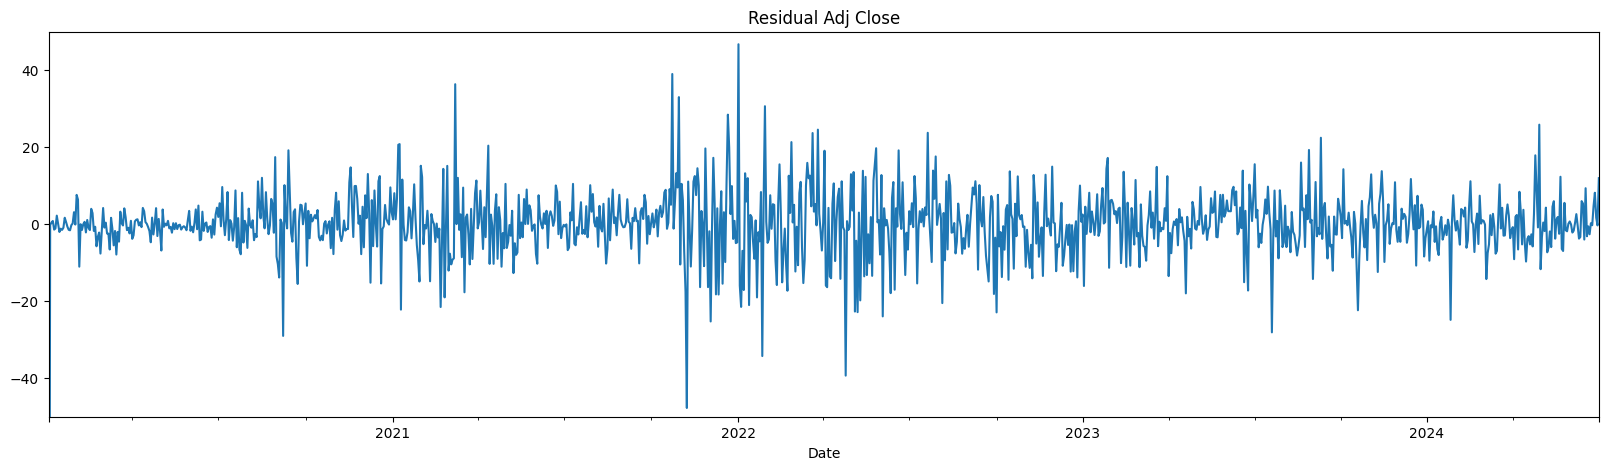

In [ ]:
df_train.Residual_Adj_Close.plot(figsize = (20,5))
plt.title('Residual Adj Close')
plt.ylim(-50,50)
plt.show()

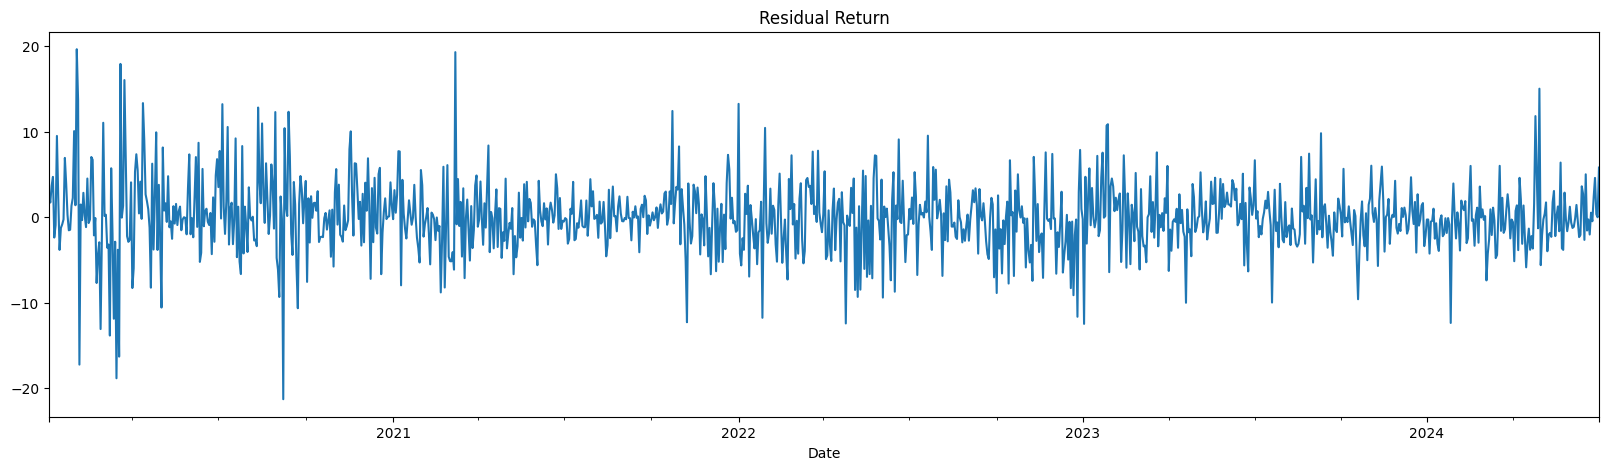

In [ ]:
df_train.Residual_Return.plot(figsize = (20,5))
plt.title('Residual Return')
plt.show()

In [ ]:
adfuller(df_train.Residual_Adj_Close)

(-40.612648954339875,
 0.0,
 0,
 1171,
 {'1%': -3.435946663265958,
  '5%': -2.864011344929883,
  '10%': -2.568085797441879},
 8074.598471667722)

In [ ]:
adfuller(df_train.Residual_Return)

(-34.16252438800979,
 0.0,
 0,
 1171,
 {'1%': -3.435946663265958,
  '5%': -2.864011344929883,
  '10%': -2.568085797441879},
 6464.058505242907)

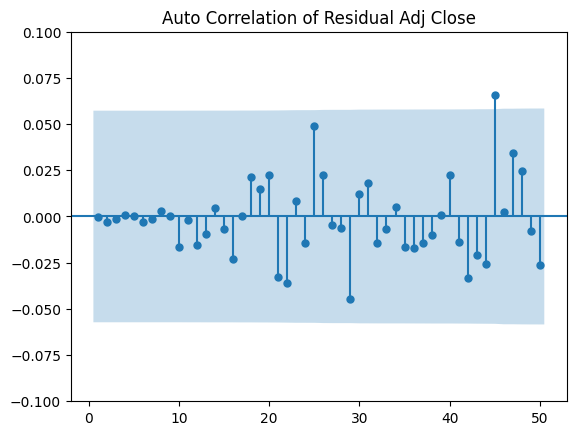

In [ ]:
sgt.plot_acf(df_train.Residual_Adj_Close, lags=50, zero = False)
plt.title('Auto Correlation of Residual Adj Close')
plt.ylim(-0.1,0.1)
plt.show()

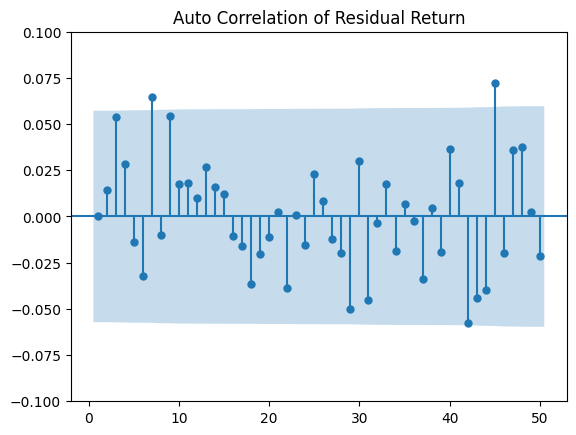

In [ ]:
sgt.plot_acf(df_train.Residual_Return, lags=50, zero = False)
plt.title('Auto Correlation of Residual Return')
plt.ylim(-0.1,0.1)
plt.show()

# **AR Validation**



In [ ]:
predictions = results_ar_10.predict(start=len(df_train), end=len(df_train) + len(df_test) - 1)

predictions.name = 'Adj_Close_Predicted'

In [ ]:
df_test['Residual_Adj_Close'] = df_test['Adj_Close'] - predictions

<ipython-input-123-15b6fe1a5d44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Residual_Adj_Close'] = df_test['Adj_Close'] - predictions


In [ ]:
df_test = pd.concat([df_test, predictions], axis=1)

In [ ]:
df_test.head()

,Open,High,Low,Close,Adj_Close,Volume,Market_Cap,Return,Residual_Adj_Close,Adj_Close_Predicted
2024-07-02,218.889999,231.300003,218.059998,231.259995,231.259995,205047900.0,4.741938e+10,10.197271,20.784261,210.475734
2024-07-03,234.559998,248.350006,234.250000,246.389999,246.389999,166561500.0,4.103909e+10,6.542422,36.419721,209.970278
2024-07-04,234.559998,248.350006,234.250000,246.389999,246.389999,166561500.0,4.103909e+10,0.000000,36.191011,210.198989
2024-07-05,249.809998,252.369995,242.460007,251.520004,251.520004,154501200.0,3.886014e+10,2.082067,39.854588,211.665416
2024-07-08,247.710007,259.440002,244.570007,252.940002,252.940002,157219600.0,3.976713e+10,0.564567,41.185395,211.754608


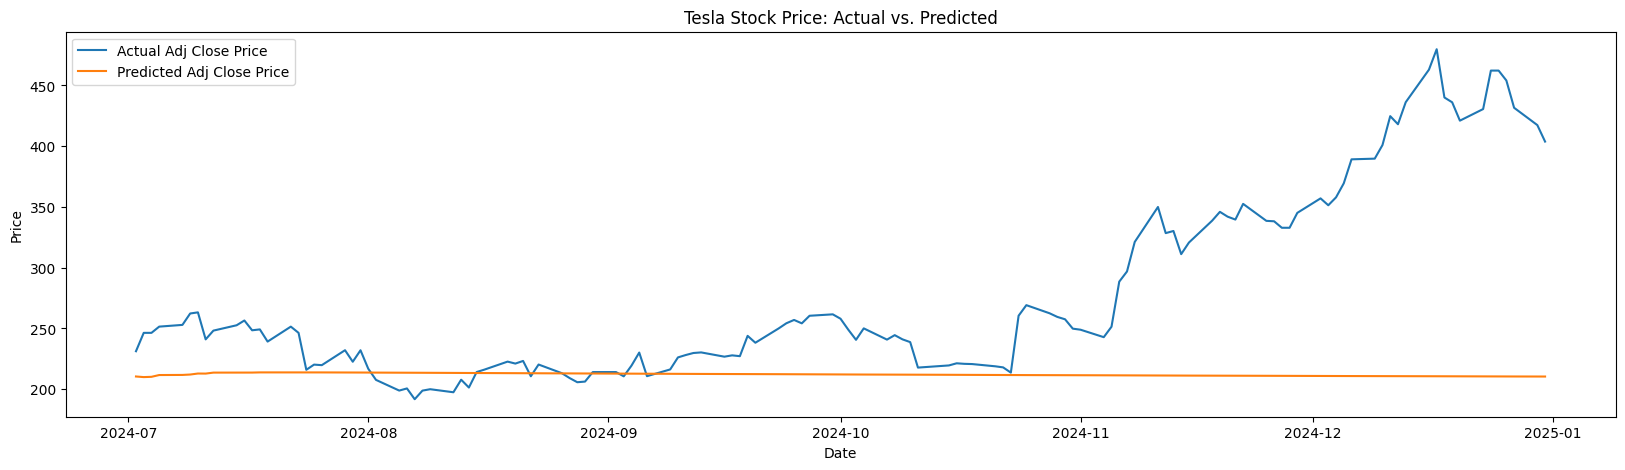

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df_test.index, df_test['Adj_Close'], label='Actual Adj Close Price')
plt.plot(df_test.index, df_test['Adj_Close_Predicted'], label='Predicted Adj Close Price')
plt.title('Tesla Stock Price: Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
predictions = results_ar_1_return.predict(start=len(df_train), end=len(df_train) + len(df_test) - 1)

predictions.name = 'Return_Predicted'

In [ ]:
df_test['Residual_Return'] = df_test['Return'] - predictions

In [ ]:
df_test = pd.concat([df_test, predictions], axis=1)

In [ ]:
df_test.head()

,Open,High,Low,Close,Adj_Close,Volume,Market_Cap,Return,Residual_Adj_Close,Adj_Close_Predicted,Residual_Return,Return_Predicted
2024-07-02,218.889999,231.300003,218.059998,231.259995,231.259995,205047900.0,4.741938e+10,10.197271,20.784261,210.475734,10.012866,0.184405
2024-07-03,234.559998,248.350006,234.250000,246.389999,246.389999,166561500.0,4.103909e+10,6.542422,36.419721,209.970278,6.286896,0.255526
2024-07-04,234.559998,248.350006,234.250000,246.389999,246.389999,166561500.0,4.103909e+10,0.000000,36.191011,210.198989,-0.254665,0.254665
2024-07-05,249.809998,252.369995,242.460007,251.520004,251.520004,154501200.0,3.886014e+10,2.082067,39.854588,211.665416,1.827392,0.254675
2024-07-08,247.710007,259.440002,244.570007,252.940002,252.940002,157219600.0,3.976713e+10,0.564567,41.185395,211.754608,0.309892,0.254675


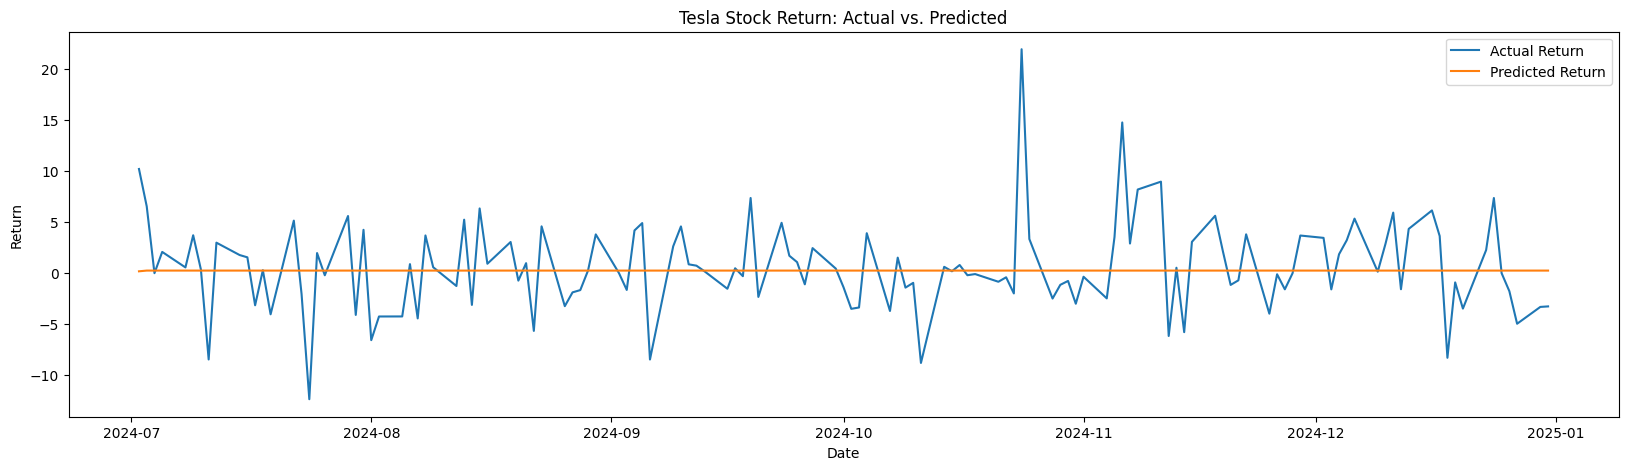

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df_test.index, df_test['Return'], label='Actual Return')
plt.plot(df_test.index, df_test['Return_Predicted'], label='Predicted Return')
plt.title('Tesla Stock Return: Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

# **Moving Average Model**

In [ ]:
models_ma = {}
results_ma = {}

for i in range(1, 31):
    model_ma = ARIMA(df_train['Return'], order=(0, 0, i))
    results_ma[i] = model_ma.fit()
    models_ma[i] = model_ma
    print(f"Model MA({i}) for return fitted... ({i}/30)")

Model MA(1) for return fitted... (1/30)
Model MA(2) for return fitted... (2/30)
Model MA(3) for return fitted... (3/30)
Model MA(4) for return fitted... (4/30)
Model MA(5) for return fitted... (5/30)
Model MA(6) for return fitted... (6/30)
Model MA(7) for return fitted... (7/30)
Model MA(8) for return fitted... (8/30)
Model MA(9) for return fitted... (9/30)
Model MA(10) for return fitted... (10/30)
Model MA(11) for return fitted... (11/30)
Model MA(12) for return fitted... (12/30)
Model MA(13) for return fitted... (13/30)
Model MA(14) for return fitted... (14/30)
Model MA(15) for return fitted... (15/30)
Model MA(16) for return fitted... (16/30)
Model MA(17) for return fitted... (17/30)
Model MA(18) for return fitted... (18/30)
Model MA(19) for return fitted... (19/30)
Model MA(20) for return fitted... (20/30)
Model MA(21) for return fitted... (21/30)
Model MA(22) for return fitted... (22/30)
Model MA(23) for return fitted... (23/30)
Model MA(24) for return fitted... (24/30)
Model MA(2

In [ ]:
best_model_ma_order = 1

for i in range(2, 31):
    p_value = LLR_Test(results_ma[best_model_ma_order], results_ma[i])
    if p_value < 0.05:
        best_model_ma_order = i

print(f"Best MA model order: {best_model_ma_order}")

Best MA model order: 1


In [ ]:
model_ma_1 = ARIMA(df_train.Adj_Close, order=(0, 0, 1))
results_ma_1 = model_ma_1.fit()

In [ ]:
results_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj_Close   No. Observations:                 1172
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -6086.076
Date:                Wed, 01 Jan 2025   AIC                          12178.152
Time:                        17:20:49   BIC                          12193.351
Sample:                    01-03-2020   HQIC                         12183.884
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        206.6741      2.564     80.605      0.000     201.649     211.700
ma.L1          0.9390      0.011     84.505      0.000       0.917       0.961
sigma2      1893.5306     81.606     23.203      0.000    1733.585    2053.476
===================================================================================
Ljung-Box (L1) (Q):                 863.38   Jarque-Bera (JB):                 7.34
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               0.16   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
models_ma_return = {}
results_ma_return = {}

for i in range(1, 31):
    model_ma_return = ARIMA(df_train['Return'], order=(0, 0, i))
    results_ma_return[i] = model_ma_return.fit()
    models_ma_return[i] = model_ma_return
    print(f"Model MA({i}) for return fitted... ({i}/30)")

Model MA(1) for return fitted... (1/30)
Model MA(2) for return fitted... (2/30)
Model MA(3) for return fitted... (3/30)
Model MA(4) for return fitted... (4/30)
Model MA(5) for return fitted... (5/30)
Model MA(6) for return fitted... (6/30)
Model MA(7) for return fitted... (7/30)
Model MA(8) for return fitted... (8/30)
Model MA(9) for return fitted... (9/30)
Model MA(10) for return fitted... (10/30)
Model MA(11) for return fitted... (11/30)
Model MA(12) for return fitted... (12/30)
Model MA(13) for return fitted... (13/30)
Model MA(14) for return fitted... (14/30)
Model MA(15) for return fitted... (15/30)
Model MA(16) for return fitted... (16/30)
Model MA(17) for return fitted... (17/30)
Model MA(18) for return fitted... (18/30)
Model MA(19) for return fitted... (19/30)
Model MA(20) for return fitted... (20/30)
Model MA(21) for return fitted... (21/30)
Model MA(22) for return fitted... (22/30)
Model MA(23) for return fitted... (23/30)
Model MA(24) for return fitted... (24/30)
Model MA(2

In [ ]:
best_model_ma_return_order = 1

for i in range(2, 31):
    p_value = LLR_Test(results_ma_return[best_model_ma_return_order], results_ma_return[i])
    if p_value < 0.05:
        best_model_ma_return_order = i

print(f"Best MA model order for Return: {best_model_ma_return_order}")

Best MA model order for Return: 1


In [ ]:
model_ma_1_return = ARIMA(df_train.Return, order=(0, 0, 1))
results_ma_1_return = model_ma_1_return.fit()

In [ ]:
results_ma_1_return.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Return   No. Observations:                 1172
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -3322.501
Date:                Wed, 01 Jan 2025   AIC                           6651.002
Time:                        17:24:26   BIC                           6666.202
Sample:                    01-03-2020   HQIC                          6656.734
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2547      0.119      2.137      0.033       0.021       0.488
ma.L1         -0.0118      0.023     -0.521      0.602      -0.056       0.032
sigma2        16.9780      0.436     38.908      0.000      16.123      17.833
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               504.85
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# **Residual Analysis**

In [ ]:
df_train['Residual_Adj_Close_MA'] = results_ma_1.resid

<ipython-input-141-1d0fecf2a9d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Residual_Adj_Close_MA'] = results_ma_1.resid


In [ ]:
df_train['Residual_Return_MA'] = results_ma_1_return.resid

<ipython-input-142-61d99ee03bdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Residual_Return_MA'] = results_ma_1_return.resid


In [ ]:
df_train.Residual_Adj_Close_MA.mean()

-0.06661716065782852

In [ ]:
df_train.Residual_Return_MA.mean()

1.1635235935589968e-05

In [ ]:
df_train.Residual_Adj_Close_MA.std()

43.796712184181196

In [ ]:
df_train.Residual_Return_MA.std()

4.1221992770076685

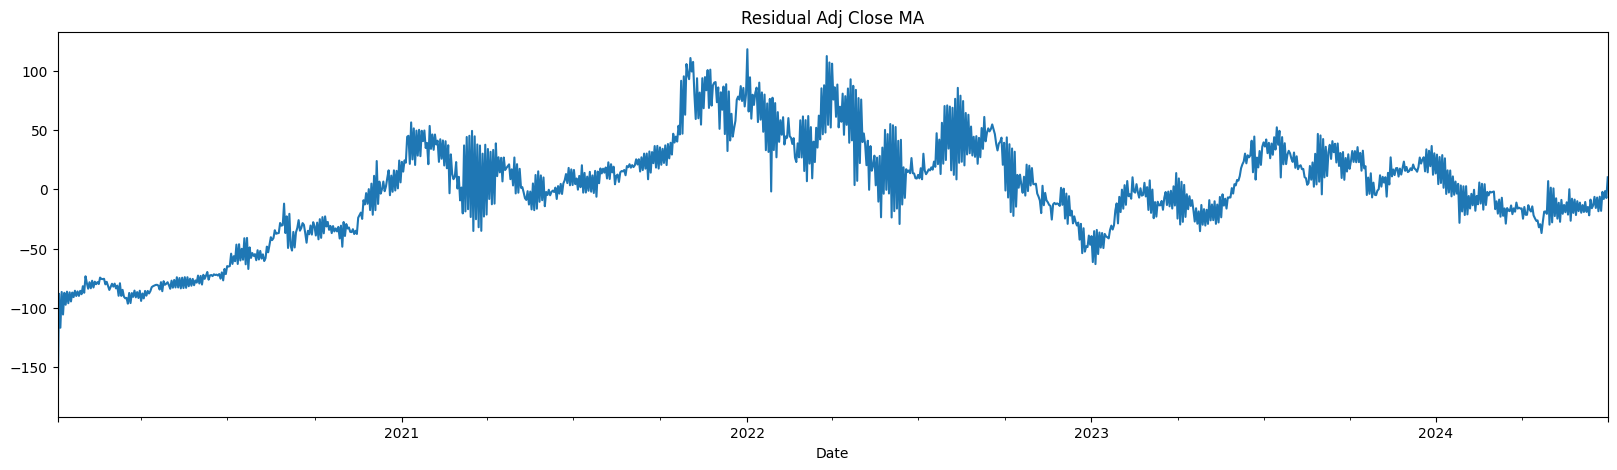

In [ ]:
df_train.Residual_Adj_Close_MA.plot(figsize = (20,5))
plt.title('Residual Adj Close MA')
plt.show()

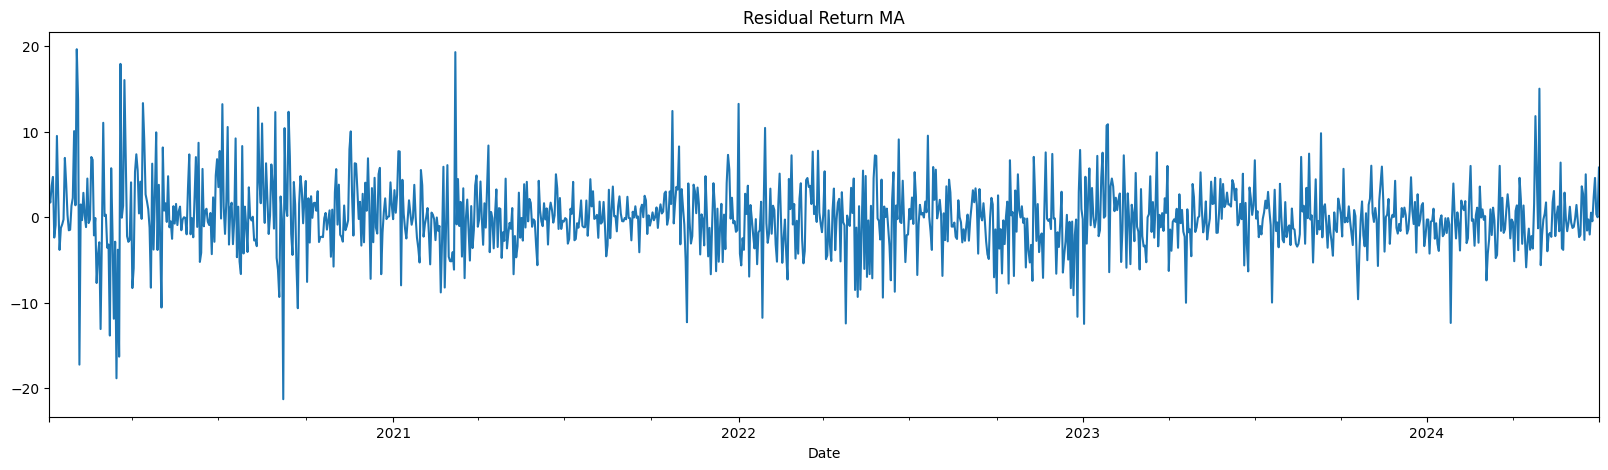

In [ ]:
df_train.Residual_Return_MA.plot(figsize = (20,5))
plt.title('Residual Return MA')
plt.show()

In [ ]:
adfuller(df_train.Residual_Adj_Close_MA)

(-2.5074346425215097,
 0.1136758596275873,
 5,
 1166,
 {'1%': -3.4359707158251345,
  '5%': -2.864021955976527,
  '10%': -2.568091448619991},
 8092.030953784199)

In [ ]:
adfuller(df_train.Residual_Return_MA)

(-34.17428312897925,
 0.0,
 0,
 1171,
 {'1%': -3.435946663265958,
  '5%': -2.864011344929883,
  '10%': -2.568085797441879},
 6464.06661101972)

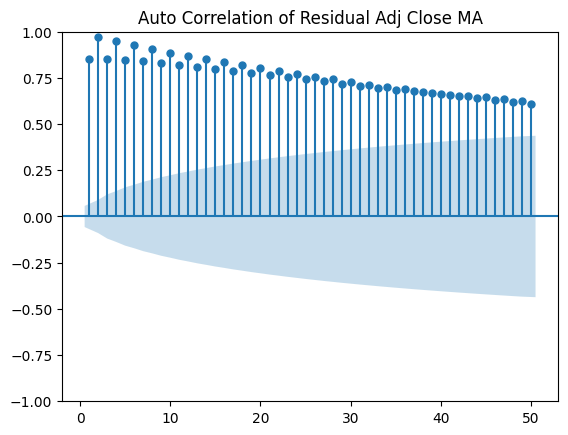

In [ ]:
sgt.plot_acf(df_train.Residual_Adj_Close_MA, lags=50, zero = False)
plt.title('Auto Correlation of Residual Adj Close MA')
plt.show()

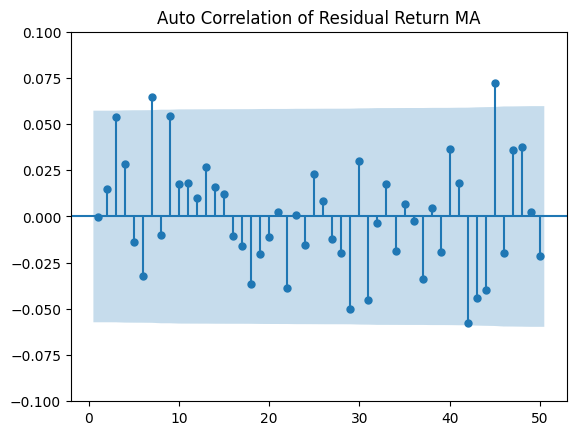

In [ ]:
sgt.plot_acf(df_train.Residual_Return_MA, lags=50, zero = False)
plt.title('Auto Correlation of Residual Return MA')
plt.ylim(-0.1,0.1)
plt.show()

# **MA Validation**

In [ ]:
predictions_MA = results_ma_1.predict(start=len(df_train), end=len(df_train) + len(df_test) - 1)

predictions_MA.name = 'Adj_Close_Predicted_MA'

In [ ]:
df_test['Residual_Adj_Close_MA'] = df_test['Adj_Close'] - predictions_MA

In [ ]:
df_test = pd.concat([df_test, predictions_MA], axis=1)

In [ ]:
df_test.head()

,Open,High,Low,Close,Adj_Close,Volume,Market_Cap,Return,Residual_Adj_Close,Adj_Close_Predicted,Residual_Return,Return_Predicted,Residual_Adj_Close_MA,Adj_Close_Predicted_MA
2024-07-02,218.889999,231.300003,218.059998,231.259995,231.259995,205047900.0,4.741938e+10,10.197271,20.784261,210.475734,10.012866,0.184405,15.109285,216.150709
2024-07-03,234.559998,248.350006,234.250000,246.389999,246.389999,166561500.0,4.103909e+10,6.542422,36.419721,209.970278,6.286896,0.255526,39.715854,206.674146
2024-07-04,234.559998,248.350006,234.250000,246.389999,246.389999,166561500.0,4.103909e+10,0.000000,36.191011,210.198989,-0.254665,0.254665,39.715854,206.674146
2024-07-05,249.809998,252.369995,242.460007,251.520004,251.520004,154501200.0,3.886014e+10,2.082067,39.854588,211.665416,1.827392,0.254675,44.845858,206.674146
2024-07-08,247.710007,259.440002,244.570007,252.940002,252.940002,157219600.0,3.976713e+10,0.564567,41.185395,211.754608,0.309892,0.254675,46.265857,206.674146


In [ ]:
predictions_MA = results_ma_1_return.predict(start=len(df_train), end=len(df_train) + len(df_test) - 1)

predictions_MA.name = 'Return_Predicted_MA'

In [ ]:
df_test['Residual_Return_MA'] = df_test['Return'] - predictions_MA

In [ ]:
df_test = pd.concat([df_test, predictions_MA], axis=1)

In [ ]:
df_test.head()

,Open,High,Low,Close,Adj_Close,Volume,Market_Cap,Return,Residual_Adj_Close,Adj_Close_Predicted,Residual_Return,Return_Predicted,Residual_Adj_Close_MA,Adj_Close_Predicted_MA,Residual_Return_MA,Return_Predicted_MA
2024-07-02,218.889999,231.300003,218.059998,231.259995,231.259995,205047900.0,4.741938e+10,10.197271,20.784261,210.475734,10.012866,0.184405,15.109285,216.150709,10.010873,0.186399
2024-07-03,234.559998,248.350006,234.250000,246.389999,246.389999,166561500.0,4.103909e+10,6.542422,36.419721,209.970278,6.286896,0.255526,39.715854,206.674146,6.287767,0.254655
2024-07-04,234.559998,248.350006,234.250000,246.389999,246.389999,166561500.0,4.103909e+10,0.000000,36.191011,210.198989,-0.254665,0.254665,39.715854,206.674146,-0.254655,0.254655
2024-07-05,249.809998,252.369995,242.460007,251.520004,251.520004,154501200.0,3.886014e+10,2.082067,39.854588,211.665416,1.827392,0.254675,44.845858,206.674146,1.827412,0.254655
2024-07-08,247.710007,259.440002,244.570007,252.940002,252.940002,157219600.0,3.976713e+10,0.564567,41.185395,211.754608,0.309892,0.254675,46.265857,206.674146,0.309912,0.254655


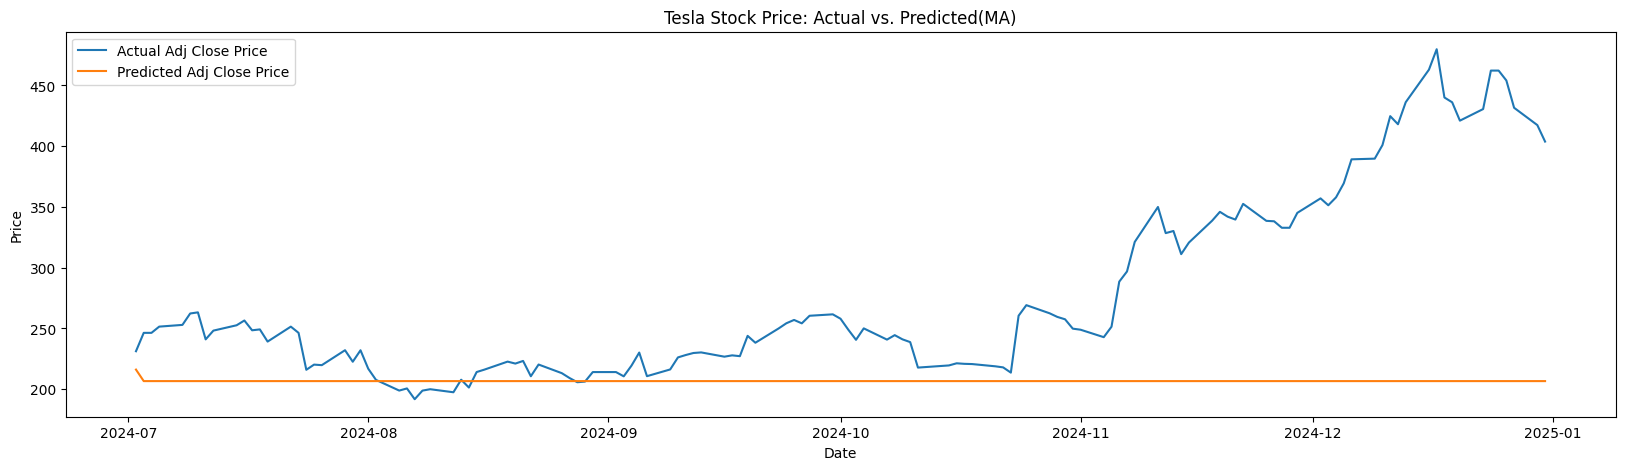

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df_test.index, df_test['Adj_Close'], label='Actual Adj Close Price')
plt.plot(df_test.index, df_test['Adj_Close_Predicted_MA'], label='Predicted Adj Close Price')
plt.title('Tesla Stock Price: Actual vs. Predicted(MA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

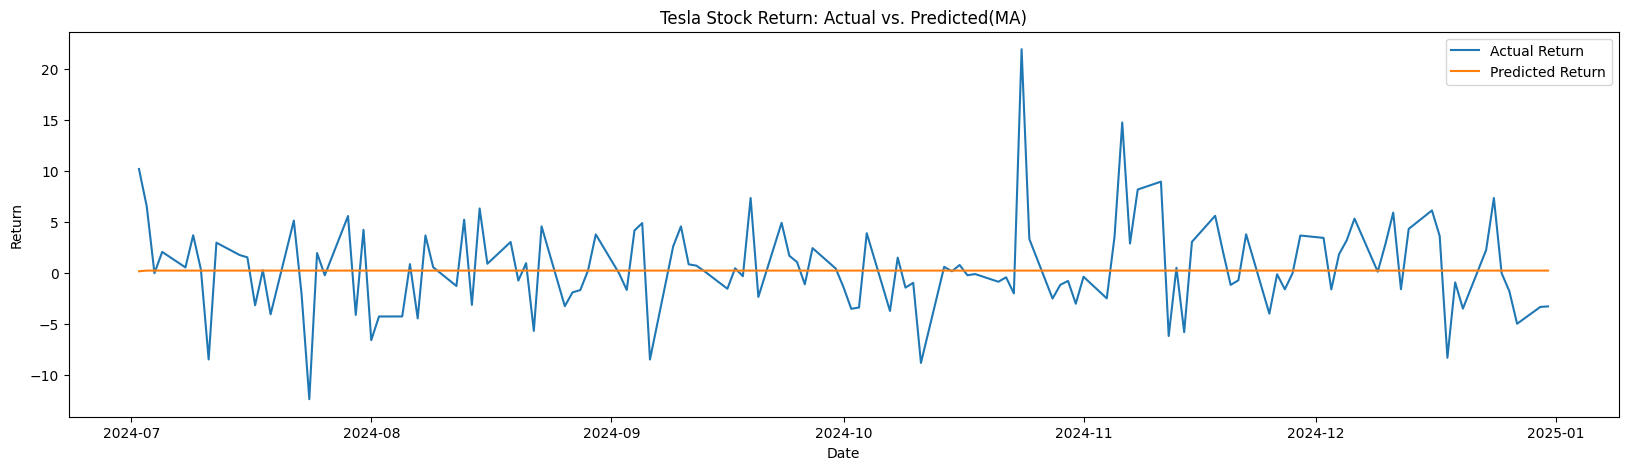

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df_test.index, df_test['Return'], label='Actual Return')
plt.plot(df_test.index, df_test['Return_Predicted_MA'], label='Predicted Return')
plt.title('Tesla Stock Return: Actual vs. Predicted(MA)')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

# **ARMA**

In [ ]:
model_ar_1_ma_1 = ARIMA(df_train.Adj_Close, order=(1, 0, 1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()

In [ ]:
results_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj_Close   No. Observations:                 1172
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -4124.814
Date:                Thu, 02 Jan 2025   AIC                           8257.628
Time:                        06:59:44   BIC                           8277.894
Sample:                    01-03-2020   HQIC                          8265.271
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        206.6214     38.673      5.343      0.000     130.823     282.419
ar.L1          0.9962      0.002    510.626      0.000       0.992       1.000
ma.L1         -0.0271      0.025     -1.081      0.280      -0.076       0.022
sigma2        66.4787      1.580     42.071      0.000      63.382      69.576
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               831.95
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.04
Prob(H) (two-sided):                  0.94   Kurtosis:                         7.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_arch
from scipy import stats
import itertools

In [ ]:
def llr_test(model1, model2):
    l1 = model1.llf
    l2 = model2.llf

    p1, q1 = model1.model_orders['ar'], model1.model_orders['ma']
    p2, q2 = model2.model_orders['ar'], model2.model_orders['ma']

    df = (p2 + q2) - (p1 + q1)

    lr = 2 * (l2 - l1)
    p_value = stats.chi2.sf(lr, df)

    return p_value

In [ ]:
model_ar_10_ma_10 = ARIMA(df_train.Adj_Close, order=(10, 0, 10))
results_ar_10_ma_10 = model_ar_10_ma_10.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model_ar_6_ma_2 = ARIMA(df_train.Adj_Close, order=(6, 0, 2))
results_ar_6_ma_2 = model_ar_6_ma_2.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model_ar_5_ma_3 = ARIMA(df_train.Adj_Close, order=(5, 0, 3))
results_ar_5_ma_3 = model_ar_5_ma_3.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model_ar_4_ma_10 = ARIMA(df_train.Adj_Close, order=(4, 0, 10))
results_ar_4_ma_10 = model_ar_4_ma_10.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
results_ar_6_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj_Close   No. Observations:                 1172
Model:                 ARIMA(6, 0, 2)   Log Likelihood               -4115.332
Date:                Thu, 02 Jan 2025   AIC                           8250.663
Time:                        07:52:24   BIC                           8301.328
Sample:                    01-03-2020   HQIC                          8269.771
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        206.6774     37.443      5.520      0.000     133.291     280.063
ar.L1         -0.4151      0.126     -3.302      0.001      -0.662      -0.169
ar.L2          0.7967      0.056     14.314      0.000       0.688       0.906
ar.L3          0.5917      0.129      4.574      0.000       0.338       0.845
ar.L4          0.0985      0.031      3.165      0.002       0.038       0.160
ar.L5          0.0177      0.028      0.639      0.523      -0.037       0.072
ar.L6         -0.1021      0.027     -3.760      0.000      -0.155      -0.049
ma.L1          1.3927      0.129     10.838      0.000       1.141       1.645
ma.L2          0.5787      0.129      4.475      0.000       0.325       0.832
sigma2        65.6086      1.602     40.964      0.000      62.469      68.748
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               870.87
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.05
Prob(H) (two-sided):                  1.00   Kurtosis:                         7.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
results_ar_5_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj_Close   No. Observations:                 1172
Model:                 ARIMA(5, 0, 3)   Log Likelihood               -4121.758
Date:                Thu, 02 Jan 2025   AIC                           8263.516
Time:                        07:32:23   BIC                           8314.180
Sample:                    01-03-2020   HQIC                          8282.623
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        206.6646     40.634      5.086      0.000     127.023     286.306
ar.L1          0.9660      0.144      6.707      0.000       0.684       1.248
ar.L2         -0.1576      0.041     -3.887      0.000      -0.237      -0.078
ar.L3          1.0793      0.024     45.453      0.000       1.033       1.126
ar.L4         -0.8446      0.145     -5.826      0.000      -1.129      -0.560
ar.L5         -0.0445      0.026     -1.717      0.086      -0.095       0.006
ma.L1          0.0096      0.138      0.069      0.945      -0.261       0.281
ma.L2          0.2020      0.124      1.633      0.103      -0.040       0.444
ma.L3         -0.8831      0.139     -6.372      0.000      -1.155      -0.611
sigma2        65.6489      1.683     39.015      0.000      62.351      68.947
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               840.85
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -0.06
Prob(H) (two-sided):                  0.92   Kurtosis:                         7.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
results_ar_4_ma_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj_Close   No. Observations:                 1172
Model:                ARIMA(4, 0, 10)   Log Likelihood               -4112.071
Date:                Thu, 02 Jan 2025   AIC                           8256.142
Time:                        07:53:46   BIC                           8337.205
Sample:                    01-03-2020   HQIC                          8286.713
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        206.6981    147.240      1.404      0.160     -81.887     495.283
ar.L1          1.0193      0.190      5.376      0.000       0.648       1.391
ar.L2         -0.3853      0.303     -1.270      0.204      -0.980       0.209
ar.L3         -0.2793      0.285     -0.979      0.328      -0.839       0.280
ar.L4          0.6429      0.171      3.758      0.000       0.308       0.978
ma.L1         -0.0444      0.191     -0.232      0.816      -0.419       0.331
ma.L2          0.3619      0.132      2.739      0.006       0.103       0.621
ma.L3          0.6380      0.173      3.696      0.000       0.300       0.976
ma.L4          0.0677      0.030      2.233      0.026       0.008       0.127
ma.L5         -0.0307      0.032     -0.964      0.335      -0.093       0.032
ma.L6          0.0073      0.033      0.221      0.825      -0.057       0.072
ma.L7          0.1076      0.033      3.228      0.001       0.042       0.173
ma.L8         -0.0435      0.034     -1.278      0.201      -0.110       0.023
ma.L9          0.0705      0.030      2.343      0.019       0.012       0.130
ma.L10         0.0006      0.038      0.015      0.988      -0.074       0.075
sigma2        64.9500      1.700     38.215      0.000      61.619      68.281
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               777.82
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.11
Prob(H) (two-sided):                  0.93   Kurtosis:                         6.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
results_ar_10_ma_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj_Close   No. Observations:                 1172
Model:               ARIMA(10, 0, 10)   Log Likelihood               -4110.088
Date:                Thu, 02 Jan 2025   AIC                           8264.176
Time:                        08:01:30   BIC                           8375.638
Sample:                    01-03-2020   HQIC                          8306.212
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        206.7043    399.571      0.517      0.605    -576.440     989.849
ar.L1         -0.4482      2.066     -0.217      0.828      -4.497       3.601
ar.L2         -0.3976      0.687     -0.578      0.563      -1.745       0.950
ar.L3         -0.3347      0.949     -0.353      0.724      -2.194       1.524
ar.L4         -0.0057      0.434     -0.013      0.990      -0.855       0.844
ar.L5          0.0410      0.492      0.083      0.934      -0.923       1.005
ar.L6          0.2620      0.382      0.686      0.493      -0.486       1.010
ar.L7          0.5912      0.481      1.230      0.219      -0.351       1.533
ar.L8          0.4877      1.051      0.464      0.643      -1.572       2.548
ar.L9          0.5405      0.467      1.157      0.247      -0.375       1.456
ar.L10         0.2543      0.694      0.366      0.714      -1.107       1.615
ma.L1          1.4193      2.066      0.687      0.492      -2.630       5.469
ma.L2          1.7940      1.679      1.069      0.285      -1.496       5.084
ma.L3          2.1219      2.423      0.876      0.381      -2.627       6.870
ma.L4          2.2157      2.706      0.819      0.413      -3.088       7.520
ma.L5          2.2065      2.589      0.852      0.394      -2.868       7.281
ma.L6          1.9362      2.617      0.740      0.459      -3.193       7.065
ma.L7          1.3747      2.188      0.628      0.530      -2.913       5.663
ma.L8          0.8293      1.262      0.657      0.511      -1.644       3.303
ma.L9          0.3019      0.690      0.438      0.662      -1.050       1.654
ma.L10         0.0142      0.136      0.105      0.916      -0.252       0.280
sigma2        66.4968      1.777     37.415      0.000      63.013      69.980
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               967.41
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.17
Prob(H) (two-sided):                  0.89   Kurtosis:                         7.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
llr_test(results_ar_5_ma_3, results_ar_10_ma_10)

0.02497907236054338

In [ ]:
def fit_arma_models(df, target_col):
    results = {}
    for p in range(11):  # AR order from 0 to 10
        for q in range(11):  # MA order from 0 to 10
            try:
                model = ARIMA(df[target_col], order=(p, 0, q))
                fit = model.fit()
                results[(p, q)] = fit
            except:
                continue
    return results

In [ ]:
def are_models_nested(model1, model2):
    p1, q1 = model1
    p2, q2 = model2
    return p1 >= p2 and q1 >= q2 and (p1 + q1) > (p2 + q2)

In [ ]:
def llr_test(model1, model2):
    loglik1 = model1.llf  # Log likelihood of the first model
    loglik2 = model2.llf  # Log likelihood of the second model
    p1, q1 = model1.model.order
    p2, q2 = model2.model.order

    # LLR test statistic is twice the difference in log likelihoods
    llr_stat = 2 * (loglik2 - loglik1)
    dof = (p2 + q2) - (p1 + q1)  # Degrees of freedom: difference in parameters
    p_value = 1 - sm.stats.chisqprob(llr_stat, dof)  # p-value from chi-square distribution

    return p_value

In [ ]:
def compare_models(results):
    best_model = None  # Initialize best_model to None
    best_aic = np.inf
    best_order = None  # Store the order of the best model

    # Initial comparison (starting with ARMA(0, 0))
    for (p1, q1), model1 in results.items():
        if best_model is None:
            best_model = model1
            best_aic = model1.aic
            best_order = (p1, q1)  # Store the order
        else:
            if model1.aic < best_aic:
                best_model = model1
                best_aic = model1.aic
                best_order = (p1, q1)  # Store the order

    # Iterate over the results to compare models
    for (p2, q2), model2 in results.items():
        # Pass the order of the best model to are_models_nested
        if are_models_nested(best_order, (p2, q2)):
            p_value = llr_test(best_model, model2)
            if p_value < 0.05:  # If p-value is less than 0.05, choose the more complex model
                best_model = model2
                best_order = (p2, q2)  # Update the order of the best model
        else:
            # For non-nested models, compare AIC and log-likelihood
            if model2.llf > best_model.llf and model2.aic < best_model.aic:
                best_model = model2
                best_order = (p2, q2)  # Update the order of the best model

    return best_model  # Return the best model

In [ ]:
results = fit_arma_models(df_train, 'Return')



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/st

In [ ]:
best_arma_model = compare_models(results)
print("Best ARMA Model Summary:")
print(best_arma_model.summary())

Best ARMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                 Return   No. Observations:                 1172
Model:                          ARIMA   Log Likelihood               -3322.585
Date:                Thu, 02 Jan 2025   AIC                           6649.169
Time:                        08:28:31   BIC                           6659.302
Sample:                    01-03-2020   HQIC                          6652.991
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2547      0.121      2.112      0.035       0.018       0.491
sigma2        16.9806      0.435     39.002      0.000      16.127      17.834
Ljung-Box (L1) (Q):        